# STC Paylater Company

**Terdapat 3 dataset**


1.   train test loan application data (ini beda loan id)
2.   prev application (ini setiap loan id itu ada record peminjaman sebelumnya gitu)
3.  instalment_payment (ini isinya lebih ke data cicilan)




# Machine Learning Workflow

Secara umum, urutan dalam proses machine learning adalah sebagai berikut:
1. EDA (Exploratory data analysis)
2. Data preprocessing
3. Seleksi model
4. Evaluasi model

Namun, terkadang terdapat overlapping antara EDA atau data preprocessing sesuai data yang ada.

***Referensi***

1.   https://medium.com/analytics-vidhya/how-relevant-is-heatmap-in-your-machine-learning-model-6eb79a820f18
2.   https://medium.com/analytics-vidhya/data-preprocessing-and-exploratory-data-analysis-for-machine-learning-75b8a6468b72
3.  https://medium.com/@ndleah/eda-data-preprocessing-feature-engineering-we-are-different-d2a5fa09f527
4. https://datascience.stackexchange.com/questions/100191/preprocessing-eda-and-feature-engineering#:~:text=EDA%20%2D%20no%20model%20trained%20yet,input%20to%20your%20ML%20model.
5. https://medium.com/@trinayanbharadwaj/how-to-handle-missing-values-in-data-science-beginners-guide-3fa1152d2c21
6. https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/
7. https://builtin.com/data-science/pandas-groupby
8. https://towardsdatascience.com/how-to-encode-categorical-columns-using-python-9af10b36f049




# Load Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import (GridSearchCV)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
    roc_auc_score
)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

loan_df_train = pd.read_csv("/content/drive/MyDrive/STC LOGIKA UI 2024/Coding/train.csv")
loan_df_test = pd.read_csv("/content/drive/MyDrive/STC LOGIKA UI 2024/Coding/test.csv")
prev_df = pd.read_csv("/content/drive/MyDrive/STC LOGIKA UI 2024/Coding/previous_applications.csv")
history_df = pd.read_csv("/content/drive/MyDrive/STC LOGIKA UI 2024/Coding/payment_history.csv")

pd.set_option("display.precision", 2)

In [3]:
# import pandas as pd
# import matplotlib.pyplot as plt

# loan_df_train = pd.read_csv("train.csv")
# loan_df_test = pd.read_csv("test.csv")
# prev_df = pd.read_csv("previous_applications.csv")
# history_df = pd.read_csv("payment_history.csv")

In [4]:
loan_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61503 entries, 0 to 61502
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   U_ID                   61503 non-null  int64  
 1   FLAG                   61503 non-null  int64  
 2   CONTRACT_TYPE          61503 non-null  object 
 3   GENDER                 61503 non-null  object 
 4   NUM_OF_CHILDREN        61503 non-null  int64  
 5   INCOME                 61503 non-null  float64
 6   APPROVED_CREDIT        61503 non-null  float64
 7   LOAN_ANNUITY           61502 non-null  float64
 8   PRODUCT_PRICE          61441 non-null  float64
 9   INCOME_CATEGORY        61503 non-null  object 
 10  EDUCATION              61503 non-null  object 
 11  FAMILY_STATUS          61503 non-null  object 
 12  HOUSING_CATEGORY       61503 non-null  object 
 13  DAYS_AGE               61503 non-null  int64  
 14  DAYS_WORK              61503 non-null  int64  
 15  DA

In [5]:
loan_df_train.U_ID.nunique()

61503

In [6]:
loan_df_train.isnull().sum()

U_ID                         0
FLAG                         0
CONTRACT_TYPE                0
GENDER                       0
NUM_OF_CHILDREN              0
INCOME                       0
APPROVED_CREDIT              0
LOAN_ANNUITY                 1
PRODUCT_PRICE               62
INCOME_CATEGORY              0
EDUCATION                    0
FAMILY_STATUS                0
HOUSING_CATEGORY             0
DAYS_AGE                     0
DAYS_WORK                    0
DAYS_REGISTRATION            0
DAYS_SINCE_ID_CHANGE         0
APPLY_DAYS                   0
APPLY_HOUR                   0
ORGANIZATION_CATEGORY        0
EXTERNAL_SCORE_1         34845
EXTERNAL_SCORE_2           134
EXTERNAL_SCORE_3         12239
dtype: int64

In [7]:
print(loan_df_train["ORGANIZATION_CATEGORY"].unique())

['Business Entity Type 3' 'Other' 'NA1' 'Culture' 'Construction'
 'Self-employed' 'University' 'Kindergarten' 'Business Entity Type 2'
 'Restaurant' 'Trade: type 3' 'Services' 'Housing'
 'Business Entity Type 1' 'Industry: type 9' 'Trade: type 7'
 'Transport: type 4' 'Medicine' 'Transport: type 3' 'Trade: type 5'
 'Trade: type 2' 'School' 'Industry: type 13' 'Industry: type 7'
 'Security' 'Government' 'Agriculture' 'Industry: type 3' 'Police'
 'Transport: type 2' 'Industry: type 4' 'Security Ministries' 'Emergency'
 'Realtor' 'Electricity' 'Industry: type 11' 'Military' 'Industry: type 5'
 'Postal' 'Trade: type 6' 'Industry: type 1' 'Hotel' 'Industry: type 6'
 'Transport: type 1' 'Cleaning' 'Bank' 'Telecom' 'Insurance' 'Mobile'
 'Advertising' 'Industry: type 12' 'Legal Services' 'Trade: type 1'
 'Industry: type 2' 'Trade: type 4' 'Industry: type 10' 'Religion'
 'Industry: type 8']


In [8]:
loan_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14761 entries, 0 to 14760
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   U_ID                   14761 non-null  int64  
 1   FLAG                   14761 non-null  int64  
 2   CONTRACT_TYPE          14761 non-null  object 
 3   GENDER                 14761 non-null  object 
 4   NUM_OF_CHILDREN        14761 non-null  int64  
 5   INCOME                 14761 non-null  float64
 6   APPROVED_CREDIT        14761 non-null  float64
 7   LOAN_ANNUITY           14761 non-null  float64
 8   PRODUCT_PRICE          14741 non-null  float64
 9   INCOME_CATEGORY        14761 non-null  object 
 10  EDUCATION              14761 non-null  object 
 11  FAMILY_STATUS          14761 non-null  object 
 12  HOUSING_CATEGORY       14761 non-null  object 
 13  DAYS_AGE               14761 non-null  int64  
 14  DAYS_WORK              14761 non-null  int64  
 15  DA

In [9]:
loan_df_test.isnull().sum()

U_ID                        0
FLAG                        0
CONTRACT_TYPE               0
GENDER                      0
NUM_OF_CHILDREN             0
INCOME                      0
APPROVED_CREDIT             0
LOAN_ANNUITY                0
PRODUCT_PRICE              20
INCOME_CATEGORY             0
EDUCATION                   0
FAMILY_STATUS               0
HOUSING_CATEGORY            0
DAYS_AGE                    0
DAYS_WORK                   0
DAYS_REGISTRATION           0
DAYS_SINCE_ID_CHANGE        0
APPLY_DAYS                  0
APPLY_HOUR                  0
ORGANIZATION_CATEGORY       0
EXTERNAL_SCORE_1         8312
EXTERNAL_SCORE_2           19
EXTERNAL_SCORE_3         2919
dtype: int64

In [10]:
loan_df_test.U_ID.nunique()

14761

In [11]:
prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350712 entries, 0 to 350711
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   SK_ID_PREV                 350712 non-null  int64  
 1   U_ID                       350712 non-null  int64  
 2   CONTRACT_TYPE              350712 non-null  object 
 3   LOAN_ANNUITY               274103 non-null  float64
 4   APPLICATION                350712 non-null  float64
 5   APPROVED_CREDIT            350712 non-null  float64
 6   AMT_DOWN_PAYMENT           164205 non-null  float64
 7   PRODUCT_PRICE              271072 non-null  float64
 8   APPLY_DAYS                 350712 non-null  object 
 9   APPLY_HOUR                 350712 non-null  int64  
 10  CONTRACT_STATUS            350712 non-null  object 
 11  DAYS_DECISION              350712 non-null  int64  
 12  TERM_PAYMENT               274103 non-null  float64
 13  YIELD_GROUP                35

In [12]:
prev_df.SK_ID_PREV.nunique()

350712

In [13]:
prev_df.isnull().sum()

SK_ID_PREV                        0
U_ID                              0
CONTRACT_TYPE                     0
LOAN_ANNUITY                  76609
APPLICATION                       0
APPROVED_CREDIT                   0
AMT_DOWN_PAYMENT             186507
PRODUCT_PRICE                 79640
APPLY_DAYS                        0
APPLY_HOUR                        0
CONTRACT_STATUS                   0
DAYS_DECISION                     0
TERM_PAYMENT                  76609
YIELD_GROUP                       0
FIRST_DRAW                   139305
FIRST_DUE                    139305
TERMINATION                  139305
NFLAG_INSURED_ON_APPROVAL    139305
dtype: int64

In [14]:
prev_df["YIELD_GROUP"].unique()

array(['middle', 'low_normal', 'NA1', 'high', 'low_action'], dtype=object)

In [15]:
history_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2872306 entries, 0 to 2872305
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   SK_ID_PREV   int64  
 1   U_ID         int64  
 2   INST_NUMBER  int64  
 3   INST_DAYS    float64
 4   PAY_DAYS     float64
 5   AMT_INST     float64
 6   AMT_PAY      float64
dtypes: float64(4), int64(3)
memory usage: 153.4 MB


In [16]:
history_df.SK_ID_PREV.nunique()

211734

In [17]:
history_df.U_ID.nunique()

72301

In [18]:
history_df.isnull().sum()

SK_ID_PREV       0
U_ID             0
INST_NUMBER      0
INST_DAYS        0
PAY_DAYS       673
AMT_INST         0
AMT_PAY        673
dtype: int64

In [19]:
# Visualizing the NAN s on a heatmap

# plt.figure(figsize=(12,8))
# sns.heatmap(prev_df.isnull())

In [20]:
# Visualizing the NAN s on a heatmap

# plt.figure(figsize=(12,8))
# sns.heatmap(history_df.isnull())

# Data Preparation

## Cari duplicate data

In [21]:
duplicate_loan = loan_df_train.duplicated()
duplicate_loan.unique()

array([False])

In [22]:
duplicate_loan_test = loan_df_test.duplicated()
duplicate_loan_test.unique()

array([False])

In [23]:
duplicate_prev_loan = prev_df.duplicated()
duplicate_prev_loan.unique()

array([False])

In [24]:
duplicate_installment = history_df.duplicated()
print(duplicate_installment.sum())

8


In [25]:
# Hapus baris terduplikasi
history_df.drop_duplicates(inplace=True)

In [26]:
history_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2872298 entries, 0 to 2872305
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   SK_ID_PREV   int64  
 1   U_ID         int64  
 2   INST_NUMBER  int64  
 3   INST_DAYS    float64
 4   PAY_DAYS     float64
 5   AMT_INST     float64
 6   AMT_PAY      float64
dtypes: float64(4), int64(3)
memory usage: 175.3 MB


In [27]:
duplicate_installment = history_df.duplicated()
print(duplicate_installment.unique())

[False]


## Atur nilai yang hilang

### Nilai Numerik

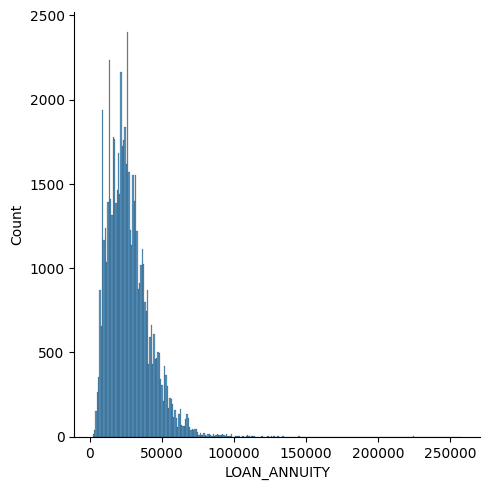

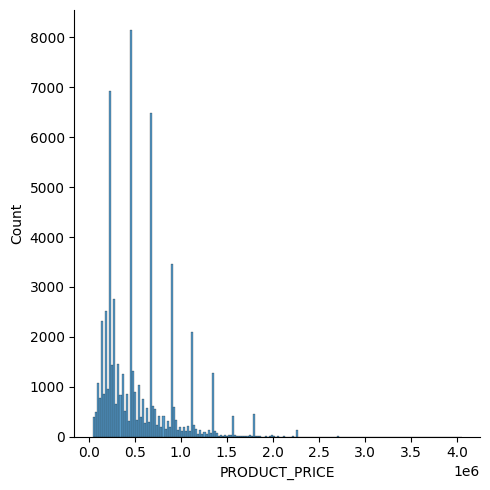

In [28]:
# Loan annuity pada loan_df_train (bukan normal distribution)
sns.displot(loan_df_train["LOAN_ANNUITY"])

# Isi nilai dengan median
loan_df_train["LOAN_ANNUITY"].fillna(loan_df_train["LOAN_ANNUITY"].median(), inplace=True)

# Product price pada loan_df_train (bukan normal distribution)
sns.displot(loan_df_train["PRODUCT_PRICE"])

# Isi nilai product price dengan median dari kolom tersebut
loan_df_train["PRODUCT_PRICE"].fillna(loan_df_train["PRODUCT_PRICE"].median(), inplace=True)

In [29]:
# Persentase nilai null pada prev.csv
percnt_1 = prev_df["LOAN_ANNUITY"].isnull().sum() / len(prev_df) * 100
print(f"% Null LOAN_ANNUITY: {percnt_1}")

percnt_2 = prev_df["AMT_DOWN_PAYMENT"].isnull().sum() / len(prev_df) * 100
print(f"% Null AMT_DOWN_PAYMENT: {percnt_2}")

percnt_3 = prev_df["PRODUCT_PRICE"].isnull().sum() / len(prev_df) * 100
print(f"% Null PRODUCT4PRICE: {percnt_3}")

percnt_4 = prev_df["TERM_PAYMENT"].isnull().sum() / len(prev_df) * 100
print(f"% Null TERM_PAYMENT: {percnt_4}")

percnt_5 = prev_df["FIRST_DRAW"].isnull().sum() / len(prev_df) * 100
print(f"% Null FIRST_DRAW: {percnt_5}")

% Null LOAN_ANNUITY: 21.843849084148818
% Null AMT_DOWN_PAYMENT: 53.17953192362964
% Null PRODUCT4PRICE: 22.708090969228312
% Null TERM_PAYMENT: 21.843849084148818
% Null FIRST_DRAW: 39.7206254704715


In [30]:
# Karena nilai null pada AMT_DOWN_PAYMENT lebih dari 50%, hapus baris nilai null tersebut
prev_df.dropna(subset=["AMT_DOWN_PAYMENT"], inplace=True)

In [31]:
# Persentase nilai null pada prev.csv
percnt_1 = prev_df["LOAN_ANNUITY"].isnull().sum() / len(prev_df) * 100
print(f"% Null LOAN_ANNUITY: {percnt_1}")

percnt_2 = prev_df["AMT_DOWN_PAYMENT"].isnull().sum() / len(prev_df) * 100
print(f"% Null AMT_DOWN_PAYMENT: {percnt_2}")

percnt_3 = prev_df["PRODUCT_PRICE"].isnull().sum() / len(prev_df) * 100
print(f"% Null PRODUCT4PRICE: {percnt_3}")

percnt_4 = prev_df["TERM_PAYMENT"].isnull().sum() / len(prev_df) * 100
print(f"% Null TERM_PAYMENT: {percnt_4}")

percnt_5 = prev_df["FIRST_DRAW"].isnull().sum() / len(prev_df) * 100
print(f"% Null FIRST_DRAW: {percnt_5}")

% Null LOAN_ANNUITY: 4.334216375871624
% Null AMT_DOWN_PAYMENT: 0.0
% Null PRODUCT4PRICE: 0.0
% Null TERM_PAYMENT: 4.334216375871624
% Null FIRST_DRAW: 15.909990560579763


In [32]:
# Ganti nilai null dengan median karena data tidak terdistribusi normal

prev_df.LOAN_ANNUITY.fillna(prev_df.LOAN_ANNUITY.median(), inplace=True)
prev_df.TERM_PAYMENT.fillna(prev_df.TERM_PAYMENT.median(), inplace=True)
prev_df.FIRST_DRAW.fillna(prev_df.FIRST_DRAW.median(), inplace=True)
prev_df.TERMINATION.fillna(prev_df.TERMINATION.median(), inplace=True)
prev_df.FIRST_DUE.fillna(prev_df.FIRST_DUE.median(), inplace=True)
prev_df.NFLAG_INSURED_ON_APPROVAL.fillna(prev_df.NFLAG_INSURED_ON_APPROVAL.median(), inplace=True)

In [33]:
prev_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164205 entries, 0 to 350711
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   SK_ID_PREV                 164205 non-null  int64  
 1   U_ID                       164205 non-null  int64  
 2   CONTRACT_TYPE              164205 non-null  object 
 3   LOAN_ANNUITY               164205 non-null  float64
 4   APPLICATION                164205 non-null  float64
 5   APPROVED_CREDIT            164205 non-null  float64
 6   AMT_DOWN_PAYMENT           164205 non-null  float64
 7   PRODUCT_PRICE              164205 non-null  float64
 8   APPLY_DAYS                 164205 non-null  object 
 9   APPLY_HOUR                 164205 non-null  int64  
 10  CONTRACT_STATUS            164205 non-null  object 
 11  DAYS_DECISION              164205 non-null  int64  
 12  TERM_PAYMENT               164205 non-null  float64
 13  YIELD_GROUP                16

SK_ID_PREV     0
U_ID           0
INST_NUMBER    0
INST_DAYS      0
PAY_DAYS       0
AMT_INST       0
AMT_PAY        0
dtype: int64

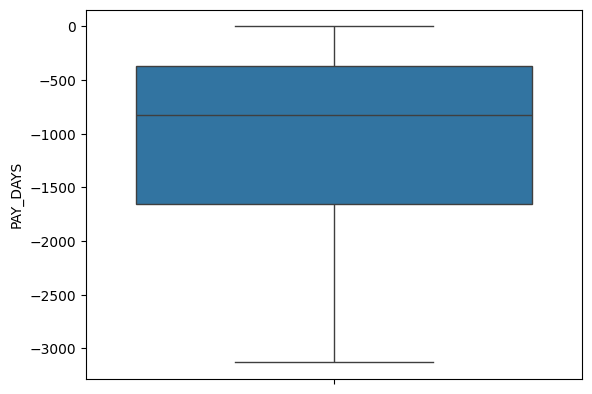

In [34]:
# Lihat distribusi nilai pada history_df (tidak terdapat outliers)
sns.boxplot(history_df.PAY_DAYS)

# Hapus row yang memiliki nilai null karena distribusi data tidak memiliki outliers
history_df.dropna(subset=["PAY_DAYS"], inplace=True)

history_df.isnull().sum()

## Feature Engineering

**Memproses Data Hari DAYS_WORK untuk client yang pensiunan**

In [35]:
dup_train = loan_df_train.copy()


# Data DAYS_WORK
work_train = dup_train.DAYS_WORK.replace(365243, 0)
loan_df_train.DAYS_WORK = work_train

loan_df_train.drop(["EXTERNAL_SCORE_1", "EXTERNAL_SCORE_2", "EXTERNAL_SCORE_3", "APPLY_HOUR", "APPLY_DAYS", "DAYS_REGISTRATION", "DAYS_SINCE_ID_CHANGE", "GENDER"], axis=1, inplace=True)

# External score 1 2 3 dihapus
# apply hour dan apply days
# days registration, days_since_id_change
# gender

loan_df_train.head(10)

,U_ID,FLAG,CONTRACT_TYPE,NUM_OF_CHILDREN,INCOME,APPROVED_CREDIT,LOAN_ANNUITY,PRODUCT_PRICE,INCOME_CATEGORY,EDUCATION,FAMILY_STATUS,HOUSING_CATEGORY,DAYS_AGE,DAYS_WORK,ORGANIZATION_CATEGORY
0,333538,0,Revolving loans,1,67500.0,202500.0,10125.0,202500.0,Working,Secondary / secondary special,Married,With parents,-11539,-921,Business Entity Type 3
1,406644,0,Cash loans,1,202500.0,976711.5,49869.0,873000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15743,-4482,Other
2,259130,0,Cash loans,0,180000.0,407520.0,25060.5,360000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20775,0,NA1
3,411997,0,Cash loans,0,225000.0,808650.0,26086.5,675000.0,State servant,Higher education,Married,House / apartment,-20659,-10455,Culture
4,241559,0,Revolving loans,0,135000.0,180000.0,9000.0,180000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-9013,-1190,Construction
5,296530,0,Cash loans,2,135000.0,592560.0,32274.0,450000.0,Working,Higher education,Married,House / apartment,-10495,-744,Business Entity Type 3
6,266655,0,Cash loans,0,90000.0,71109.0,5746.5,54000.0,Working,Secondary / secondary special,Married,Municipal apartment,-19417,-1672,Self-employed
7,305500,0,Cash loans,0,112500.0,562500.0,16578.0,562500.0,State servant,Higher education,Married,House / apartment,-16771,-1340,University
8,108004,0,Cash loans,1,112500.0,360000.0,17509.5,360000.0,Working,Secondary / secondary special,Married,House / apartment,-9763,-791,Kindergarten
9,231371,0,Cash loans,1,112500.0,512446.5,34375.5,463500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-10270,-451,Business Entity Type 3


In [36]:
# Untuk data test
dup_test = loan_df_test.copy()

# Data DAYS_WORK
work_test = dup_test.DAYS_WORK.replace(365243, 0)
loan_df_test.DAYS_WORK = work_test

loan_df_test.drop(["EXTERNAL_SCORE_1", "EXTERNAL_SCORE_2", "EXTERNAL_SCORE_3", "APPLY_HOUR", "APPLY_DAYS", "DAYS_REGISTRATION", "DAYS_SINCE_ID_CHANGE", "GENDER"], axis=1, inplace=True)


loan_df_test.head(10)

,U_ID,FLAG,CONTRACT_TYPE,NUM_OF_CHILDREN,INCOME,APPROVED_CREDIT,LOAN_ANNUITY,PRODUCT_PRICE,INCOME_CATEGORY,EDUCATION,FAMILY_STATUS,HOUSING_CATEGORY,DAYS_AGE,DAYS_WORK,ORGANIZATION_CATEGORY
0,219092,0,Cash loans,3,135000.0,871029.0,44604.0,765000.0,Working,Secondary / secondary special,Married,House / apartment,-17598,-2650,Business Entity Type 3
1,141577,0,Cash loans,0,144000.0,485640.0,34537.5,450000.0,Working,Higher education,Married,Office apartment,-14097,-7408,Kindergarten
2,180205,0,Cash loans,1,90000.0,247500.0,8887.5,247500.0,Working,Secondary / secondary special,Married,House / apartment,-18384,-2826,Self-employed
3,357381,0,Cash loans,2,112500.0,506889.0,24781.5,418500.0,Working,Secondary / secondary special,Married,House / apartment,-12170,-926,Other
4,271229,0,Cash loans,0,216000.0,450000.0,21888.0,450000.0,Working,Incomplete higher,Married,House / apartment,-10790,-577,Business Entity Type 3
5,374711,0,Cash loans,0,58500.0,135000.0,7321.5,135000.0,Working,Secondary / secondary special,Single / not married,With parents,-10942,-3100,Security
6,400364,0,Cash loans,2,90000.0,260640.0,18666.0,225000.0,Working,Higher education,Married,House / apartment,-11658,-4198,Business Entity Type 2
7,133189,0,Cash loans,2,112500.0,900297.0,32026.5,751500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-15602,0,NA1
8,146009,0,Cash loans,0,112500.0,665892.0,19210.5,477000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20625,0,NA1
9,327796,0,Cash loans,2,90000.0,284400.0,13833.0,225000.0,Working,Secondary / secondary special,Married,House / apartment,-10450,-1605,Business Entity Type 3


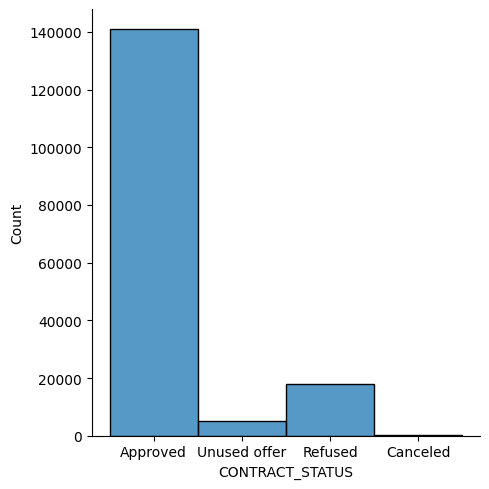

In [37]:
sns.displot(prev_df.CONTRACT_STATUS)

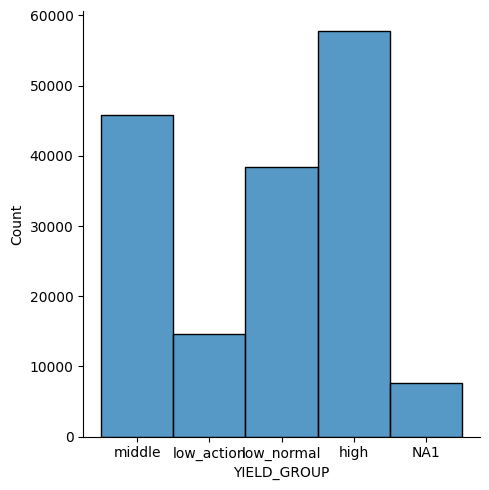

In [38]:
sns.displot(prev_df.YIELD_GROUP)

In [39]:
prev_df.TERMINATION

0          -37.0
5         -804.0
6         -101.0
7         -116.0
9         -990.0
           ...  
350685   -1857.0
350693    -888.0
350695    -967.0
350697   -1833.0
350711   -1716.0
Name: TERMINATION, Length: 164205, dtype: float64

In [40]:
prev_df.drop(["DAYS_DECISION", "APPLY_DAYS", "APPLY_HOUR", "FIRST_DRAW", "FIRST_DUE", "TERMINATION", "CONTRACT_STATUS"], axis=1, inplace=True)
prev_df.head(10)

# days_decision, apply_days, apply_hour, first_draw, (FIRST DUE, TERMINATION) sementara dihapus

,SK_ID_PREV,U_ID,CONTRACT_TYPE,LOAN_ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRODUCT_PRICE,TERM_PAYMENT,YIELD_GROUP,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43,17145.0,17145.0,0.0,17145.0,12.0,middle,0.0
5,1151694,161591,Consumer loans,39111.07,214380.0,209497.5,13500.0,214380.0,6.0,middle,0.0
6,2057616,304455,Consumer loans,15542.73,129505.5,131112.0,9000.0,129505.5,10.0,middle,0.0
7,2586290,447421,Consumer loans,10274.04,126544.5,101232.0,25312.5,126544.5,12.0,middle,0.0
9,1946657,427532,Consumer loans,7795.12,147195.0,172840.5,0.0,147195.0,24.0,low_action,0.0
10,1894597,442603,Consumer loans,2334.42,39996.0,45153.0,0.0,39996.0,24.0,low_normal,0.0
11,1241792,404105,Consumer loans,23343.03,132480.0,125527.5,13248.0,132480.0,6.0,middle,1.0
15,1519873,258336,Consumer loans,4699.03,46530.0,46300.5,4653.0,46530.0,12.0,middle,0.0
17,1851241,415052,Consumer loans,9675.85,46476.0,48775.5,0.0,46476.0,6.0,high,0.0
21,2822378,276770,Consumer loans,1542.06,22815.0,20533.5,2281.5,22815.0,24.0,low_normal,0.0


In [41]:
# Hapus inst_number
history_df.drop(["INST_NUMBER"], axis=1, inplace=True)
history_df.head(10)

,SK_ID_PREV,U_ID,INST_DAYS,PAY_DAYS,AMT_INST,AMT_PAY
0,1137312,164489,-1384.0,-1417.0,5970.38,5970.38
1,2723183,112102,-197.0,-197.0,70.74,70.74
2,2558880,154793,-1262.0,-1269.0,15031.08,15031.08
3,1410565,197687,-1037.0,-1048.0,12514.05,12510.45
4,2391610,183431,-1680.0,-1693.0,7875.00,7875.00
5,1995642,134723,-1277.0,-1282.0,12949.20,12949.20
6,1840786,175114,-476.0,-474.0,21179.70,21161.70
7,1720935,176364,-354.0,-356.0,61192.53,61192.53
8,2671380,111601,-540.0,-548.0,8109.77,8109.77
9,1846594,186032,-810.0,-810.0,7389.09,7389.09


## Proses Data Untuk Join Table

**Proses ID yang tidak terdapat di prev ataupun history dan sebaliknya**

In [42]:
print(f"length loan_df_train: {len(loan_df_train)}")
print(f"length loan_df_test: {len(loan_df_test)}\n")
print(f"length prev_df: {len(prev_df)}")
print(f"length history_df: {len(history_df)}\n")


# Seleksi id data train untuk loan application yang hanya terdapat di prev_df dan history_df
new_loan_df_train = loan_df_train[loan_df_train.U_ID.isin(prev_df.U_ID)]
new_loan_df_train = new_loan_df_train[new_loan_df_train.U_ID.isin(history_df.U_ID)]

# Seleksi id data test untuk loan application yang hanya terdapat di prev_df dan history_df
new_loan_df_test = loan_df_test[loan_df_test.U_ID.isin(prev_df.U_ID)]
new_loan_df_test = new_loan_df_test[new_loan_df_test.U_ID.isin(history_df.U_ID)]

# Seleksi id data prev_df train dan test yang hanya terdapat di loan_df yang telah diseleksi sebelumnya
new_prev_df_train = prev_df[prev_df.U_ID.isin(new_loan_df_train.U_ID)]
new_prev_df_test = prev_df[prev_df.U_ID.isin(new_loan_df_test.U_ID)]

# Seleksi id data history_df train dan test yang hanya terdapat di loan_df yang telah diseleksi sebelumnya
new_history_df_train = history_df[history_df.U_ID.isin(new_loan_df_train.U_ID)]
new_history_df_test = history_df[history_df.U_ID.isin(new_loan_df_test.U_ID)]

# Seleksi SK_ID_PREV dari prev_df yang hanya terdapat di history_df dan sebaliknya
new_prev_df_train = new_prev_df_train[new_prev_df_train.SK_ID_PREV.isin(new_history_df_train.SK_ID_PREV)]
new_prev_df_test = new_prev_df_test[new_prev_df_test.SK_ID_PREV.isin(new_history_df_test.SK_ID_PREV)]

# Seleksi SK_ID_PREV dari history_df yang hanya terdapat di prev_df
new_history_df_train = new_history_df_train[new_history_df_train.SK_ID_PREV.isin(new_prev_df_train.SK_ID_PREV)]
new_history_df_test = new_history_df_test[new_history_df_test.SK_ID_PREV.isin(new_prev_df_test.SK_ID_PREV)]

# Proses seleksi sekali lagi untuk loan data karena idnya ada yang tidak terdapat pada prev_df
new_loan_df_train = new_loan_df_train[new_loan_df_train.U_ID.isin(new_prev_df_train.U_ID)]
new_loan_df_test = new_loan_df_test[new_loan_df_test.U_ID.isin(new_prev_df_test.U_ID)]

print(f"length new_loan_df_train: {len(new_loan_df_train)}")
print(f"length new_loan_df_test: {len(new_loan_df_test)}\n")

print(f"length new_prev_df_train: {len(new_prev_df_train)}")
print(f"length new_prev_df_test: {len(new_prev_df_test)}\n")

print(f"length new_history_df_train: {len(new_history_df_train)}")
print(f"length new_history_df_test: {len(new_history_df_test)}\n")

prev_group_train = new_prev_df_train.groupby("U_ID", as_index=False)
prev_group_test = new_prev_df_test.groupby("U_ID", as_index=False)
history_group_train = new_history_df_train.groupby("U_ID", as_index=False)
history_group_test = new_history_df_test.groupby("U_ID", as_index=False)

length loan_df_train: 61503
length loan_df_test: 14761

length prev_df: 164205
length history_df: 2871625

length new_loan_df_train: 54079
length new_loan_df_test: 13014

length new_prev_df_train: 110235
length new_prev_df_test: 26426

length new_history_df_train: 1062202
length new_history_df_test: 252655



In [43]:
# Cek panjang data
train_id = new_loan_df_train.U_ID.unique()
test_id = new_loan_df_test.U_ID.unique()

print(f"prev_df: {np.sort(new_prev_df_train.U_ID.unique())}")
print(f"history_df: {np.sort(new_history_df_train.U_ID.unique())}")
print(f"loan_df: {np.sort(new_loan_df_train.U_ID.unique())}\n")

print(f"length id train: {len(train_id)}")
print(f"length id prev_train: {len(new_prev_df_train.U_ID.unique())}")

print(f"length sk_id prev_train: {len(new_prev_df_train.SK_ID_PREV.unique())}")
print(f"length sk_id hist_train: {len(new_history_df_train.SK_ID_PREV.unique())}")

prev_df: [100009 100039 100044 ... 456248 456252 456255]
history_df: [100009 100039 100044 ... 456248 456252 456255]
loan_df: [100009 100039 100044 ... 456248 456252 456255]

length id train: 54079
length id prev_train: 54079
length sk_id prev_train: 110235
length sk_id hist_train: 110235


sebelum: 
18
sesudah: 
0


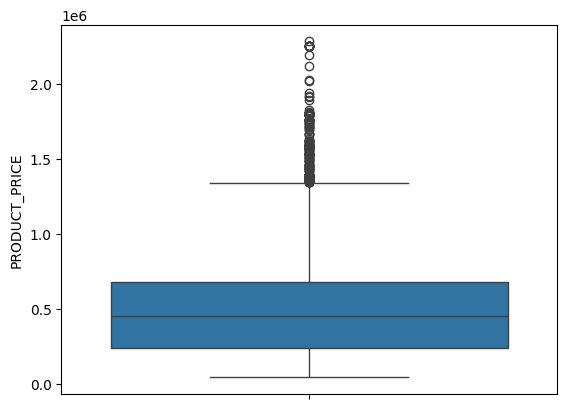

In [44]:
print(f"sebelum: \n{new_loan_df_test.PRODUCT_PRICE.isnull().sum()}")
sns.boxplot(new_loan_df_test.PRODUCT_PRICE)

# df loan test ada null 18 product price
# Isi nilai null dengan median
new_loan_df_test["PRODUCT_PRICE"].fillna(new_loan_df_test["PRODUCT_PRICE"].median(), inplace=True)
print(f"sesudah: \n{new_loan_df_test.PRODUCT_PRICE.isnull().sum()}")

In [45]:
new_prev_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110235 entries, 0 to 282808
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   SK_ID_PREV                 110235 non-null  int64  
 1   U_ID                       110235 non-null  int64  
 2   CONTRACT_TYPE              110235 non-null  object 
 3   LOAN_ANNUITY               110235 non-null  float64
 4   APPLICATION                110235 non-null  float64
 5   APPROVED_CREDIT            110235 non-null  float64
 6   AMT_DOWN_PAYMENT           110235 non-null  float64
 7   PRODUCT_PRICE              110235 non-null  float64
 8   TERM_PAYMENT               110235 non-null  float64
 9   YIELD_GROUP                110235 non-null  object 
 10  NFLAG_INSURED_ON_APPROVAL  110235 non-null  float64
dtypes: float64(7), int64(2), object(2)
memory usage: 10.1+ MB


In [46]:
# Memproses data prev training dan testing agar hanya terdapat 1 data dengan id pada train dan test yang merupakan nilai rata2 dari
# peminjaman sebelumnya tiap id tersebut

features = ["LOAN_ANNUITY", 'APPLICATION', "APPROVED_CREDIT", "AMT_DOWN_PAYMENT", "PRODUCT_PRICE", "TERM_PAYMENT"]
features_2 = ["CONTRACT_TYPE", 'YIELD_GROUP', "NFLAG_INSURED_ON_APPROVAL"]
prev_main_train = prev_group_train[features].mean()
prev_mode_train = prev_group_train[features_2].agg(lambda x:x.value_counts().index[0])


prev_main_test = prev_group_test[features].mean()
prev_mode_test = prev_group_test[features_2].agg(lambda x:x.value_counts().index[0])

prev_train_df_fix = prev_main_train.merge(prev_mode_train, on="U_ID")
prev_test_df_fix = prev_main_test.merge(prev_mode_test, on="U_ID")

prev_train_df_fix.head(10)

,U_ID,LOAN_ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRODUCT_PRICE,TERM_PAYMENT,CONTRACT_TYPE,YIELD_GROUP,NFLAG_INSURED_ON_APPROVAL
0,100009,10051.41,76741.71,70137.64,9203.14,76741.71,8.0,Consumer loans,middle,0.0
1,100039,4762.49,22835.05,23964.75,2.05,22835.05,6.0,Consumer loans,high,0.0
2,100044,14538.95,166950.00,182158.50,1695.00,166950.00,16.0,Cash loans,low_normal,1.0
3,100045,7888.46,62647.50,67995.00,1500.00,62647.50,12.0,Consumer loans,high,0.0
4,100047,4586.90,38205.00,34384.50,3820.50,38205.00,10.0,Consumer loans,low_normal,0.0
5,100051,6887.16,136620.00,152068.50,0.00,136620.00,24.0,Consumer loans,low_action,0.0
6,100056,17590.55,314460.00,353783.25,11196.00,314460.00,39.0,Consumer loans,high,0.0
7,100077,15101.28,58896.00,53005.50,5890.50,58896.00,4.0,Consumer loans,high,0.0
8,100085,4550.27,28597.50,21847.50,6750.00,28597.50,6.0,Consumer loans,high,0.0
9,100093,6837.64,59864.25,60615.00,4240.50,59864.25,11.0,Consumer loans,middle,0.0


In [47]:
# Ubah nama kolom prev train dan prev test
prev_train_df_fix.rename(columns={"LOAN_ANNUITY": "LOAN_ANN_PREV", "APPROVED_CREDIT": "APPR_CREDIT_PREV", "PRODUCT_PRICE":"PRODUCT_PRICE_PREV", "CONTRACT_TYPE":"CONTRACT_TP_PREV"}, inplace=True)
prev_test_df_fix.rename(columns={"LOAN_ANNUITY": "LOAN_ANN_PREV", "APPROVED_CREDIT": "APPR_CREDIT_PREV", "PRODUCT_PRICE":"PRODUCT_PRICE_PREV", "CONTRACT_TYPE":"CONTRACT_TP_PREV"}, inplace=True)

# Ubah NFLAG jadi integer
prev_train_df_fix.NFLAG_INSURED_ON_APPROVAL = prev_train_df_fix.NFLAG_INSURED_ON_APPROVAL.astype("int64")
prev_test_df_fix.NFLAG_INSURED_ON_APPROVAL = prev_test_df_fix.NFLAG_INSURED_ON_APPROVAL.astype("int64")

prev_train_df_fix.head(5)

,U_ID,LOAN_ANN_PREV,APPLICATION,APPR_CREDIT_PREV,AMT_DOWN_PAYMENT,PRODUCT_PRICE_PREV,TERM_PAYMENT,CONTRACT_TP_PREV,YIELD_GROUP,NFLAG_INSURED_ON_APPROVAL
0,100009,10051.41,76741.71,70137.64,9203.14,76741.71,8.0,Consumer loans,middle,0
1,100039,4762.49,22835.05,23964.75,2.05,22835.05,6.0,Consumer loans,high,0
2,100044,14538.95,166950.00,182158.50,1695.00,166950.00,16.0,Cash loans,low_normal,1
3,100045,7888.46,62647.50,67995.00,1500.00,62647.50,12.0,Consumer loans,high,0
4,100047,4586.90,38205.00,34384.50,3820.50,38205.00,10.0,Consumer loans,low_normal,0


In [48]:
# Memproses data history training dan testing agar hanya terdapat 1 data dengan id pada train dan test yang merupakan nilai rata2 dari
# peminjaman sebelumnya tiap id tersebut

features = ["INST_DAYS", "PAY_DAYS", "AMT_INST", "AMT_PAY"]

history_train_df_fix = history_group_train[features].mean()
history_test_df_fix = history_group_test[features].mean()

# Ubah kolom days jadi integer
history_train_df_fix.INST_DAYS = history_train_df_fix.INST_DAYS.astype("int64")
history_train_df_fix.PAY_DAYS = history_train_df_fix.PAY_DAYS.astype("int64")
history_test_df_fix.INST_DAYS = history_test_df_fix.INST_DAYS.astype("int64")
history_test_df_fix.PAY_DAYS = history_test_df_fix.PAY_DAYS.astype("int64")

history_train_df_fix.head(5)

,U_ID,INST_DAYS,PAY_DAYS,AMT_INST,AMT_PAY
0,100009,-685,-693,9858.91,9858.91
1,100039,-1943,-1967,5641.44,5641.44
2,100044,-1892,-1913,17194.53,16061.05
3,100045,-1620,-1626,8321.82,7628.62
4,100047,-2466,-2472,4586.00,4586.00


## Join Tabel

**Data PREV dan HISTORY**

In [49]:
# Merge prev dan history terlebih dahulu
prev_hist_df_train = prev_train_df_fix.merge(history_train_df_fix, on="U_ID")
prev_hist_df_test = prev_test_df_fix.merge(history_test_df_fix, on="U_ID")

In [50]:
# Cek shape untuk memastikan hasil join tidak aneh
print(f"shape_train: {prev_hist_df_train.shape}")
print(f"shape_test: {prev_hist_df_test.shape}")

shape_train: (54079, 14)
shape_test: (13014, 14)


In [51]:
# Liat info data untuk memastikan
prev_hist_df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13014 entries, 0 to 13013
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   U_ID                       13014 non-null  int64  
 1   LOAN_ANN_PREV              13014 non-null  float64
 2   APPLICATION                13014 non-null  float64
 3   APPR_CREDIT_PREV           13014 non-null  float64
 4   AMT_DOWN_PAYMENT           13014 non-null  float64
 5   PRODUCT_PRICE_PREV         13014 non-null  float64
 6   TERM_PAYMENT               13014 non-null  float64
 7   CONTRACT_TP_PREV           13014 non-null  object 
 8   YIELD_GROUP                13014 non-null  object 
 9   NFLAG_INSURED_ON_APPROVAL  13014 non-null  int64  
 10  INST_DAYS                  13014 non-null  int64  
 11  PAY_DAYS                   13014 non-null  int64  
 12  AMT_INST                   13014 non-null  float64
 13  AMT_PAY                    13014 non-null  flo

In [52]:
# Merge prev_hist dengan loan application
df_full_train = new_loan_df_train.merge(prev_hist_df_train, on="U_ID")
df_full_test = new_loan_df_test.merge(prev_hist_df_test, on="U_ID")

df_full_train.head()

,U_ID,FLAG,CONTRACT_TYPE,NUM_OF_CHILDREN,INCOME,APPROVED_CREDIT,LOAN_ANNUITY,PRODUCT_PRICE,INCOME_CATEGORY,EDUCATION,...,AMT_DOWN_PAYMENT,PRODUCT_PRICE_PREV,TERM_PAYMENT,CONTRACT_TP_PREV,YIELD_GROUP,NFLAG_INSURED_ON_APPROVAL,INST_DAYS,PAY_DAYS,AMT_INST,AMT_PAY
0,333538,0,Revolving loans,1,67500.0,202500.0,10125.0,202500.0,Working,Secondary / secondary special,...,2196.0,21955.50,4.0,Consumer loans,middle,0,-505,-519,5378.68,5378.68
1,406644,0,Cash loans,1,202500.0,976711.5,49869.0,873000.0,Commercial associate,Secondary / secondary special,...,0.0,180000.00,24.0,Cash loans,high,1,-1386,-1388,17421.93,10660.46
2,259130,0,Cash loans,0,180000.0,407520.0,25060.5,360000.0,Pensioner,Secondary / secondary special,...,5868.0,58671.00,12.0,Consumer loans,low_normal,0,-1455,-1462,6126.65,6126.65
3,411997,0,Cash loans,0,225000.0,808650.0,26086.5,675000.0,State servant,Higher education,...,5625.0,116313.75,12.0,Cash loans,high,1,-1752,-1756,12793.37,12793.37
4,241559,0,Revolving loans,0,135000.0,180000.0,9000.0,180000.0,Commercial associate,Secondary / secondary special,...,9210.0,55239.00,8.0,Consumer loans,low_normal,0,-924,-929,10297.58,8907.54


In [53]:
# Cek shape
print(f"shape_train: {df_full_train.shape}")
print(f"shape_test: {df_full_test.shape}")

shape_train: (54079, 28)
shape_test: (13014, 28)


In [54]:
duplicate = df_full_train.duplicated(subset="U_ID")
duplicate.unique()

array([False])

In [55]:
df_full_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13014 entries, 0 to 13013
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   U_ID                       13014 non-null  int64  
 1   FLAG                       13014 non-null  int64  
 2   CONTRACT_TYPE              13014 non-null  object 
 3   NUM_OF_CHILDREN            13014 non-null  int64  
 4   INCOME                     13014 non-null  float64
 5   APPROVED_CREDIT            13014 non-null  float64
 6   LOAN_ANNUITY               13014 non-null  float64
 7   PRODUCT_PRICE              13014 non-null  float64
 8   INCOME_CATEGORY            13014 non-null  object 
 9   EDUCATION                  13014 non-null  object 
 10  FAMILY_STATUS              13014 non-null  object 
 11  HOUSING_CATEGORY           13014 non-null  object 
 12  DAYS_AGE                   13014 non-null  int64  
 13  DAYS_WORK                  13014 non-null  int

**Cek Data OBJECT PADA DATA TRAIN DAN TEST**

In [56]:
print(f"training: \n{df_full_train.INCOME_CATEGORY.value_counts()}\n")
print(f"testing: \n{df_full_test.INCOME_CATEGORY.value_counts()}")

training: 
Working                 28365
Commercial associate    11862
Pensioner                9938
State servant            3909
Unemployed                  4
Student                     1
Name: INCOME_CATEGORY, dtype: int64

testing: 
Working                 6821
Commercial associate    2877
Pensioner               2380
State servant            936
Name: INCOME_CATEGORY, dtype: int64


In [57]:
print(f"training: \n{df_full_train.EDUCATION.value_counts()}\n")
print(f"testing: \n{df_full_test.EDUCATION.value_counts()}")

training: 
Secondary / secondary special    39047
Higher education                 12486
Incomplete higher                 1826
Lower secondary                    688
Academic degree                     32
Name: EDUCATION, dtype: int64

testing: 
Secondary / secondary special    9327
Higher education                 3056
Incomplete higher                 442
Lower secondary                   184
Academic degree                     5
Name: EDUCATION, dtype: int64


In [58]:
print(f"training: \n{df_full_train.FAMILY_STATUS.value_counts()}\n")
print(f"testing: \n{df_full_test.FAMILY_STATUS.value_counts()}")

training: 
Married                 34678
Single / not married     7817
Civil marriage           5186
Separated                3500
Widow                    2898
Name: FAMILY_STATUS, dtype: int64

testing: 
Married                 8373
Single / not married    1826
Civil marriage          1304
Separated                826
Widow                    685
Name: FAMILY_STATUS, dtype: int64


In [59]:
print(f"training: \n{df_full_train.HOUSING_CATEGORY.value_counts()}\n")
print(f"testing: \n{df_full_test.HOUSING_CATEGORY.value_counts()}")

training: 
House / apartment      48018
With parents            2570
Municipal apartment     1917
Rented apartment         886
Office apartment         476
Co-op apartment          212
Name: HOUSING_CATEGORY, dtype: int64

testing: 
House / apartment      11549
With parents             635
Municipal apartment      474
Rented apartment         193
Office apartment         120
Co-op apartment           43
Name: HOUSING_CATEGORY, dtype: int64


In [60]:
print(f"training: \n{df_full_train.ORGANIZATION_CATEGORY.value_counts()}\n")
print(f"testing: \n{df_full_test.ORGANIZATION_CATEGORY.value_counts()}")

training: 
Business Entity Type 3    11815
NA1                        9941
Self-employed              6901
Other                      2909
Medicine                   1969
Business Entity Type 2     1837
Government                 1809
School                     1606
Trade: type 7              1370
Kindergarten               1264
Construction               1205
Business Entity Type 1     1017
Transport: type 4           882
Industry: type 9            579
Industry: type 3            570
Housing                     543
Security                    525
Trade: type 3               511
Military                    486
Industry: type 11           470
Agriculture                 436
Bank                        433
Police                      422
Transport: type 2           395
Postal                      372
Security Ministries         350
Restaurant                  312
Services                    270
University                  267
Trade: type 2               266
Transport: type 3           2

In [61]:
print(f"training: \n{df_full_train.YIELD_GROUP.value_counts()}\n")
print(f"testing: \n{df_full_test.YIELD_GROUP.value_counts()}")

training: 
high          19466
middle        16179
low_normal    13232
low_action     5121
NA1              81
Name: YIELD_GROUP, dtype: int64

testing: 
high          4713
middle        3836
low_normal    3251
low_action    1191
NA1             23
Name: YIELD_GROUP, dtype: int64


**Hapus Baris INCOME_CATEGORY pada data training unemployed dan student**

In [62]:
id_to_drop = df_full_train[df_full_train.INCOME_CATEGORY == "Student"].index.values.tolist()
id_to_drop_2 = df_full_train[df_full_train.INCOME_CATEGORY == "Unemployed"].index.values.tolist()
print(id_to_drop)
print(id_to_drop_2)

df_full_train.drop(index=id_to_drop, axis=0, inplace=True)
df_full_train.drop(index=id_to_drop_2, axis=0, inplace=True)
df_full_train.reset_index(drop=True, inplace=True)

[19190]
[7434, 19715, 43961, 49717]


In [63]:
df_full_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54074 entries, 0 to 54073
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   U_ID                       54074 non-null  int64  
 1   FLAG                       54074 non-null  int64  
 2   CONTRACT_TYPE              54074 non-null  object 
 3   NUM_OF_CHILDREN            54074 non-null  int64  
 4   INCOME                     54074 non-null  float64
 5   APPROVED_CREDIT            54074 non-null  float64
 6   LOAN_ANNUITY               54074 non-null  float64
 7   PRODUCT_PRICE              54074 non-null  float64
 8   INCOME_CATEGORY            54074 non-null  object 
 9   EDUCATION                  54074 non-null  object 
 10  FAMILY_STATUS              54074 non-null  object 
 11  HOUSING_CATEGORY           54074 non-null  object 
 12  DAYS_AGE                   54074 non-null  int64  
 13  DAYS_WORK                  54074 non-null  int

In [64]:
df_full_train.DAYS_AGE.max()

-7673

In [65]:
df_full_train.DAYS_AGE.min()

-25201

# Exploratory Data Analysis


**Setelah dilakukan joining table dan data cleaning, selanjutnya akan kita lakukan ekplorasi data**

*   Eksplorasi data bertujuan untuk melihat grafik-grafik data terhadap target beserta melihat korelasi tiap feature terhadap target
*   Fokus utama dari proses ini adala melihat persebaran data tiap feature terhadap targetnya



## Eksplor data kategori dan numerik jumlah

**Terdapat 8 Data kategori yang akan dilihat persebarannya terhadap data target**

*   Contract Type
*   Income Category
*   Education
*   Family Status
* Housing Category
* Organization Category
* Contract Type Prev
* Yield Group
* num of children
* nflag_insured



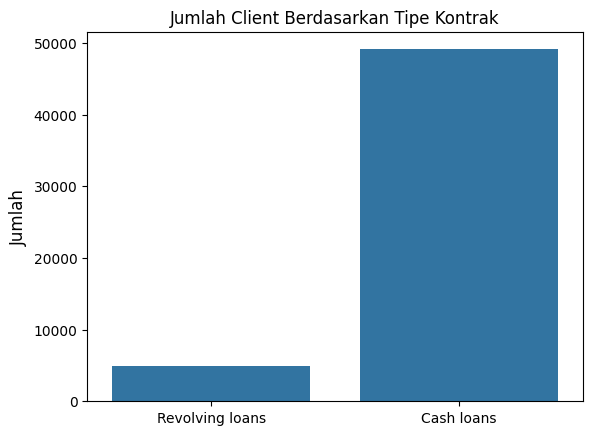

In [66]:
## Data Contract Type
fig, ax = plt.subplots()

sns.countplot(data=df_full_train, x="CONTRACT_TYPE", ax=ax)
ax.set_title("Jumlah Client Berdasarkan Tipe Kontrak")
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Jumlah", fontsize=12)

plt.show()

In [67]:
df_full_train.CONTRACT_TYPE.value_counts()

Cash loans         49098
Revolving loans     4976
Name: CONTRACT_TYPE, dtype: int64

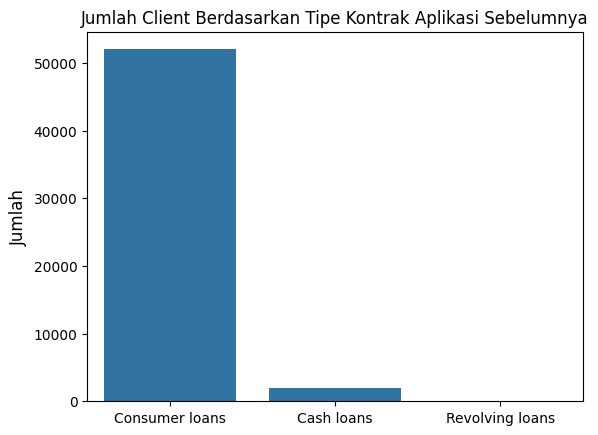

In [68]:
# Data Tipe Kontrak Prev Application
fig, ax = plt.subplots()

sns.countplot(data=df_full_train, x="CONTRACT_TP_PREV", ax=ax)
ax.set_title("Jumlah Client Berdasarkan Tipe Kontrak Aplikasi Sebelumnya", fontsize=12)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Jumlah", fontsize=12)

plt.show()

In [69]:
df_full_train.CONTRACT_TP_PREV.value_counts()

Consumer loans     52014
Cash loans          1985
Revolving loans       75
Name: CONTRACT_TP_PREV, dtype: int64

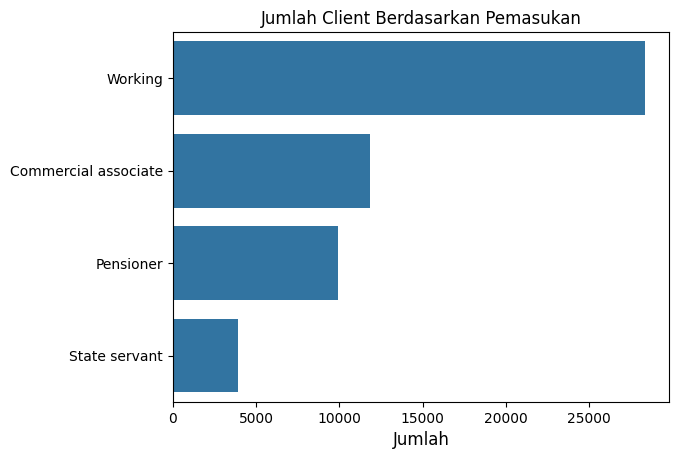

In [70]:
# Kategori Pemasukan
fig, ax = plt.subplots()

sns.countplot(data=df_full_train, y="INCOME_CATEGORY", ax=ax)
ax.set_title("Jumlah Client Berdasarkan Pemasukan")
ax.set_xlabel("Jumlah", fontsize=12)
ax.set_ylabel("", fontsize=12)

plt.show()

In [71]:
df_full_train.INCOME_CATEGORY.value_counts()

Working                 28365
Commercial associate    11862
Pensioner                9938
State servant            3909
Name: INCOME_CATEGORY, dtype: int64

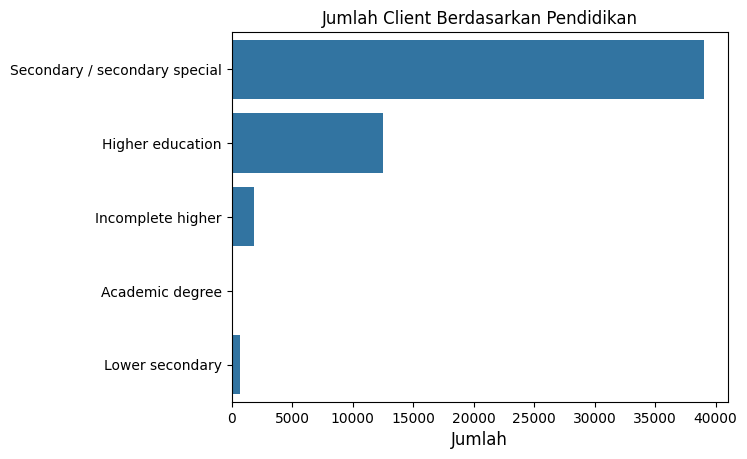

In [72]:
# Education
fig, ax = plt.subplots()

sns.countplot(data=df_full_train, y="EDUCATION", ax=ax)
ax.set_title("Jumlah Client Berdasarkan Pendidikan")
ax.set_xlabel("Jumlah", fontsize=12)
ax.set_ylabel("", fontsize=12)

plt.show()

In [73]:
df_full_train.EDUCATION.value_counts()

Secondary / secondary special    39043
Higher education                 12485
Incomplete higher                 1826
Lower secondary                    688
Academic degree                     32
Name: EDUCATION, dtype: int64

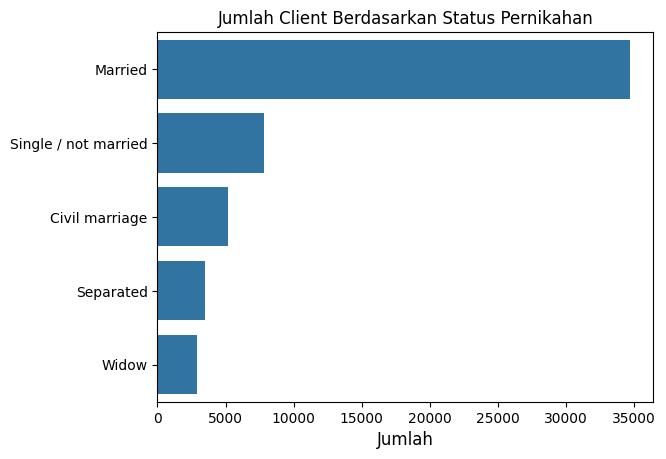

In [74]:
# Family Status
fig, ax = plt.subplots()

sns.countplot(data=df_full_train, y="FAMILY_STATUS", ax=ax)
ax.set_title("Jumlah Client Berdasarkan Status Pernikahan")
ax.set_xlabel("Jumlah", fontsize=12)
ax.set_ylabel("", fontsize=12)

plt.show()

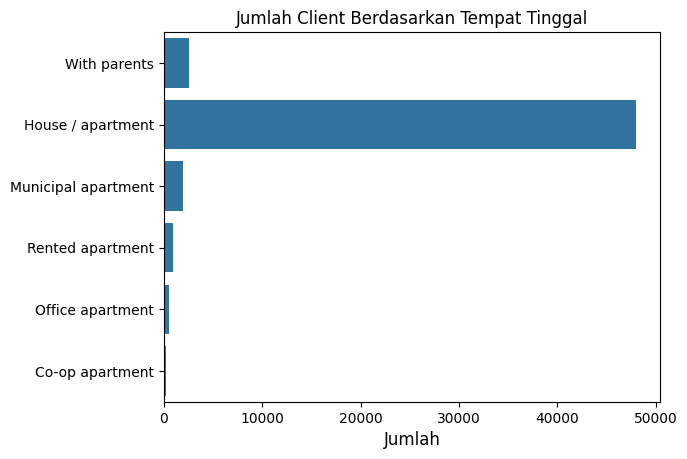

In [75]:
# Housing Kategori
fig, ax = plt.subplots()

sns.countplot(data=df_full_train, y="HOUSING_CATEGORY", ax=ax)
ax.set_title("Jumlah Client Berdasarkan Tempat Tinggal")
ax.set_xlabel("Jumlah", fontsize=12)
ax.set_ylabel("", fontsize=12)

plt.show()

In [76]:
df_full_train.HOUSING_CATEGORY.value_counts()

House / apartment      48016
With parents            2568
Municipal apartment     1916
Rented apartment         886
Office apartment         476
Co-op apartment          212
Name: HOUSING_CATEGORY, dtype: int64

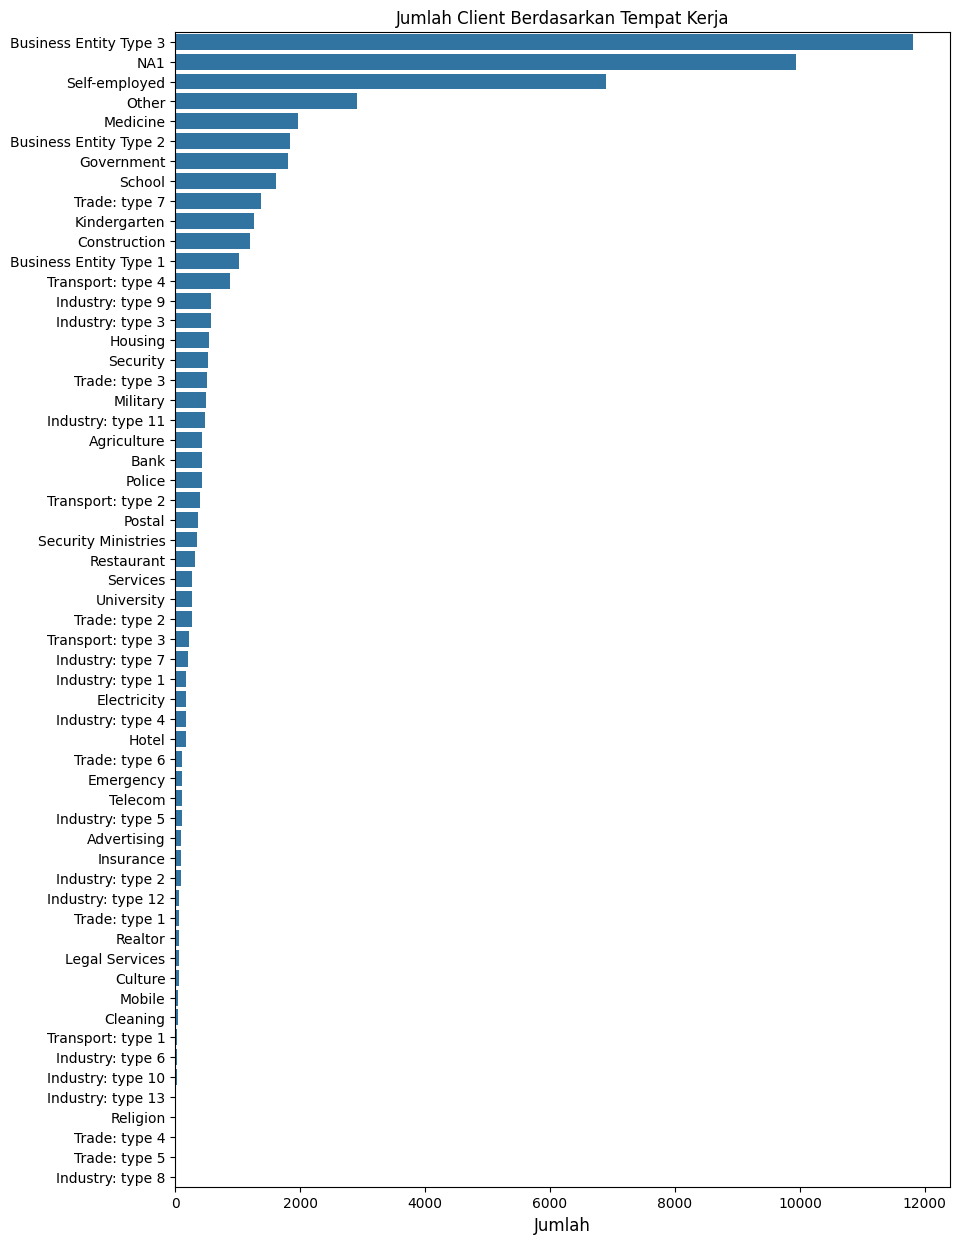

In [77]:
# Organisasi Kategori
value = df_full_train.ORGANIZATION_CATEGORY.value_counts().index

fig, ax = plt.subplots(figsize=(10,15))

sns.countplot(data=df_full_train, y="ORGANIZATION_CATEGORY", order=value ,ax=ax)
ax.set_title("Jumlah Client Berdasarkan Tempat Kerja")
ax.set_xlabel("Jumlah", fontsize=12)
ax.set_ylabel("", fontsize=12)

plt.show()

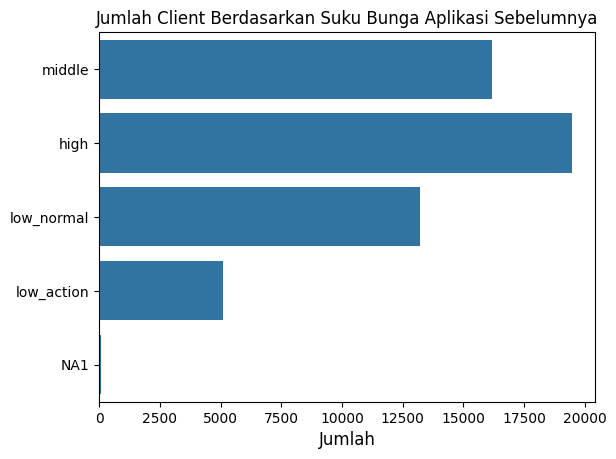

In [78]:
# Suku bunga (YIELD_GROUP)
fig, ax = plt.subplots()

sns.countplot(data=df_full_train, y="YIELD_GROUP", ax=ax)
ax.set_title("Jumlah Client Berdasarkan Suku Bunga Aplikasi Sebelumnya")
ax.set_xlabel("Jumlah", fontsize=12)
ax.set_ylabel("", fontsize=12)

plt.show()

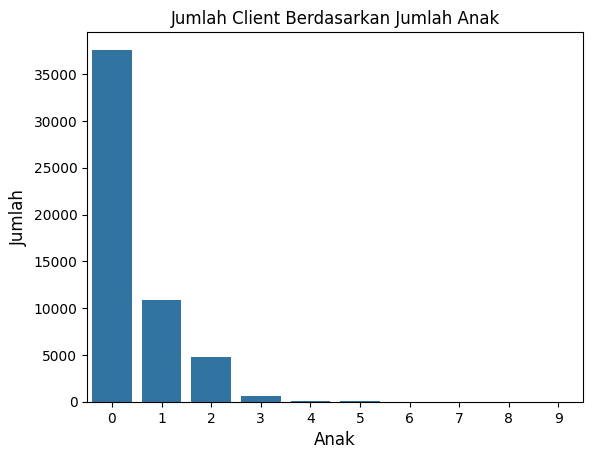

In [79]:
# Num of Children
fig, ax = plt.subplots()

sns.countplot(data=df_full_train, x="NUM_OF_CHILDREN", ax=ax)
ax.set_title("Jumlah Client Berdasarkan Jumlah Anak")
ax.set_xlabel("Anak", fontsize=12)
ax.set_ylabel("Jumlah", fontsize=12)

plt.show()

In [80]:
df_full_train.NUM_OF_CHILDREN.value_counts()

0    37610
1    10918
2     4786
3      654
4       74
5       25
6        3
7        2
8        1
9        1
Name: NUM_OF_CHILDREN, dtype: int64

<ipython-input-81-292378f97d5b>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["No", "Yes"], fontsize=12)


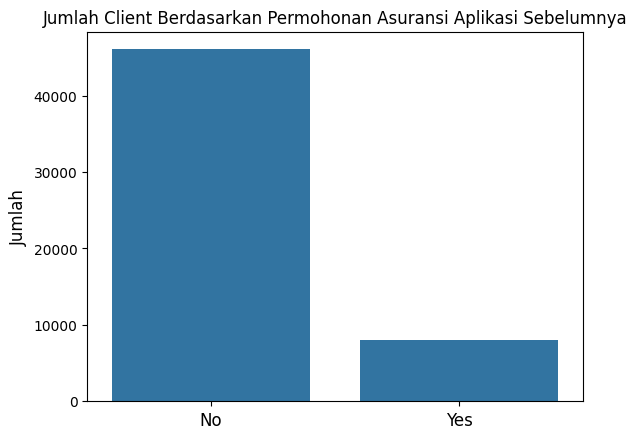

In [81]:
# Insurance
fig, ax = plt.subplots()

sns.countplot(data=df_full_train, x="NFLAG_INSURED_ON_APPROVAL", ax=ax)
ax.set_xticklabels(["No", "Yes"], fontsize=12)
ax.set_title("Jumlah Client Berdasarkan Permohonan Asuransi Aplikasi Sebelumnya")
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Jumlah", fontsize=12)

plt.show()

In [82]:
df_full_train.NFLAG_INSURED_ON_APPROVAL.value_counts()

0    46068
1     8006
Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64

In [83]:
# Term Payment
df_full_train.TERM_PAYMENT.value_counts()

12.00    11436
10.00     7060
6.00      6880
8.00      3199
24.00     2886
         ...  
9.38         1
17.11        1
14.29        1
16.17        1
10.07        1
Name: TERM_PAYMENT, Length: 376, dtype: int64

## Data Kategori, Beberapa data Numerik terhadap Target

<Figure size 640x480 with 0 Axes>

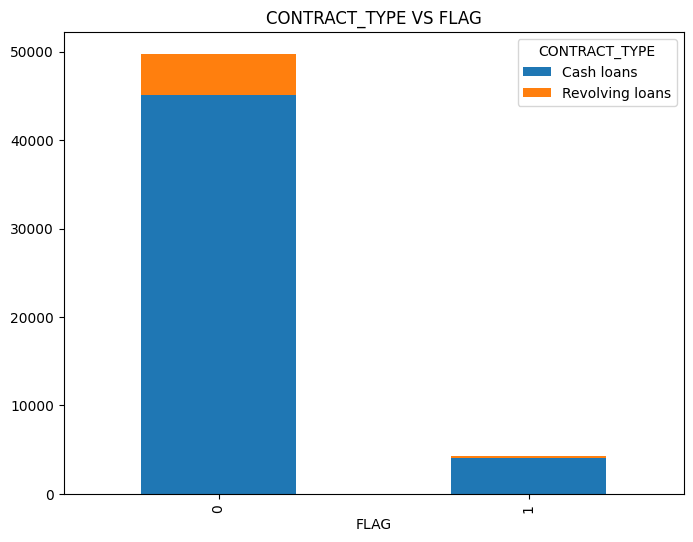

In [84]:
# Kategori Kontrak
def figure_stacked(col1, col2="FLAG"):
  fig = pd.crosstab(df_full_train[col2], df_full_train[col1])
  plt.figure()
  fig.plot(kind="bar", stacked=True, figsize=(8,6))
  plt.title(f"{col1} VS {col2}")

figure_stacked("CONTRACT_TYPE")

<Figure size 640x480 with 0 Axes>

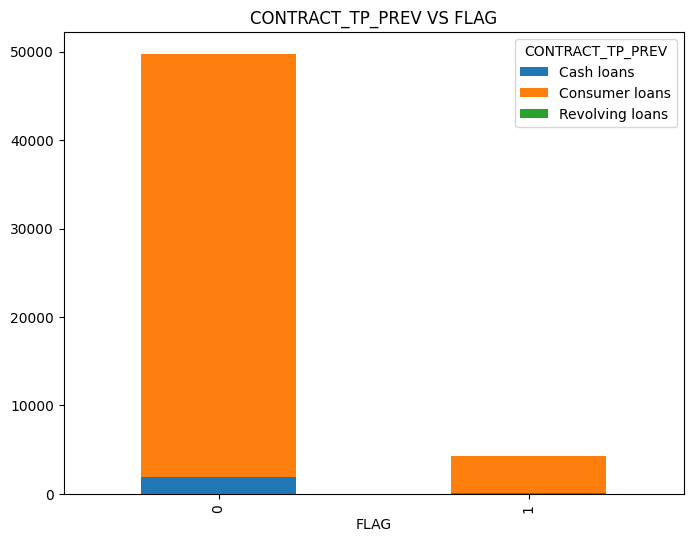

In [85]:
# Contract Type Prev
figure_stacked("CONTRACT_TP_PREV")

<Figure size 640x480 with 0 Axes>

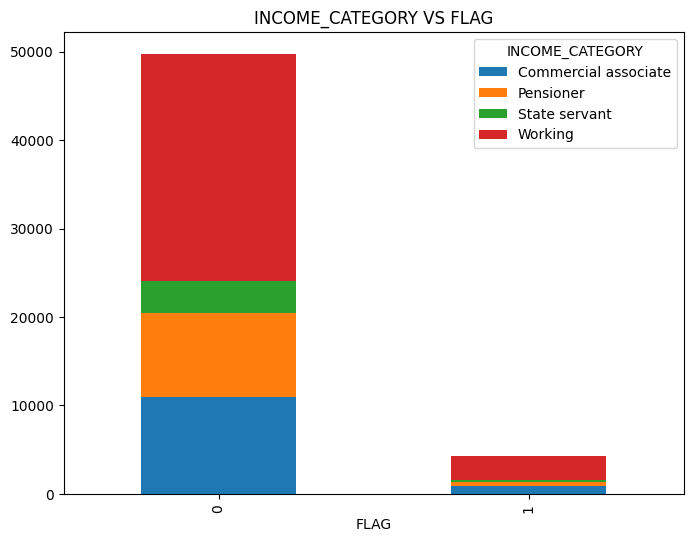

In [86]:
# Kategori Pemasukan
figure_stacked("INCOME_CATEGORY")

<Figure size 640x480 with 0 Axes>

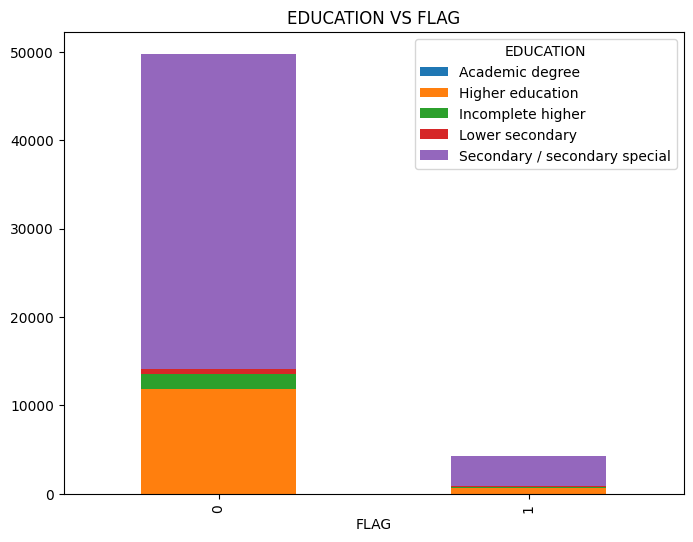

In [87]:
# Education
figure_stacked("EDUCATION")

<Figure size 640x480 with 0 Axes>

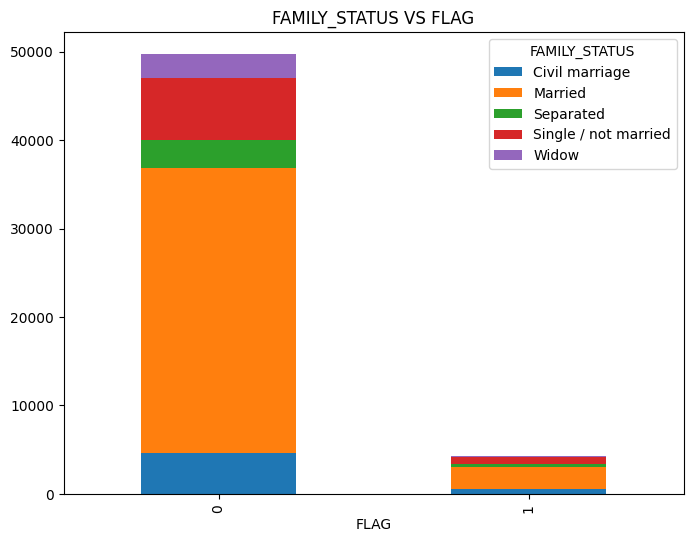

In [88]:
# Status Kekeluargaan
figure_stacked("FAMILY_STATUS")

<Figure size 640x480 with 0 Axes>

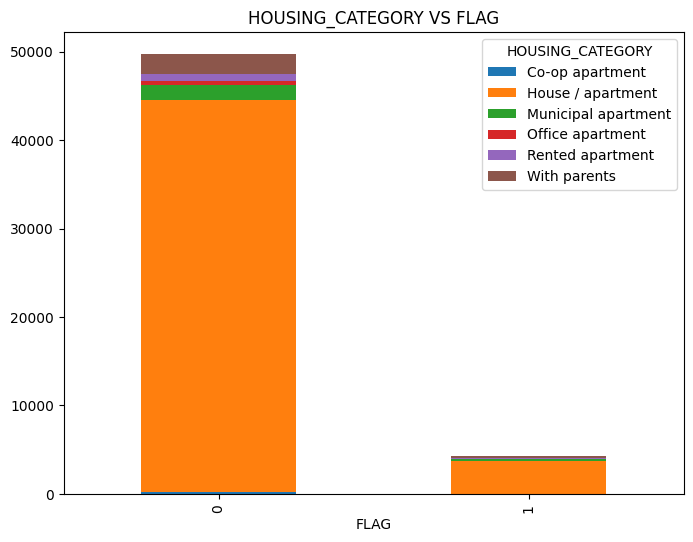

In [89]:
# Kategori Tempat Tinggal
figure_stacked("HOUSING_CATEGORY")

<Figure size 640x480 with 0 Axes>

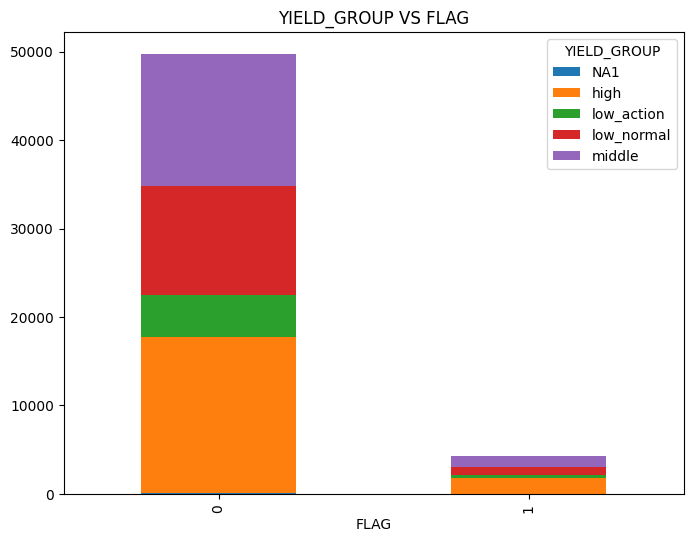

In [90]:
# Suku bunga aplikasi sebelumnya
figure_stacked("YIELD_GROUP")

<Figure size 640x480 with 0 Axes>

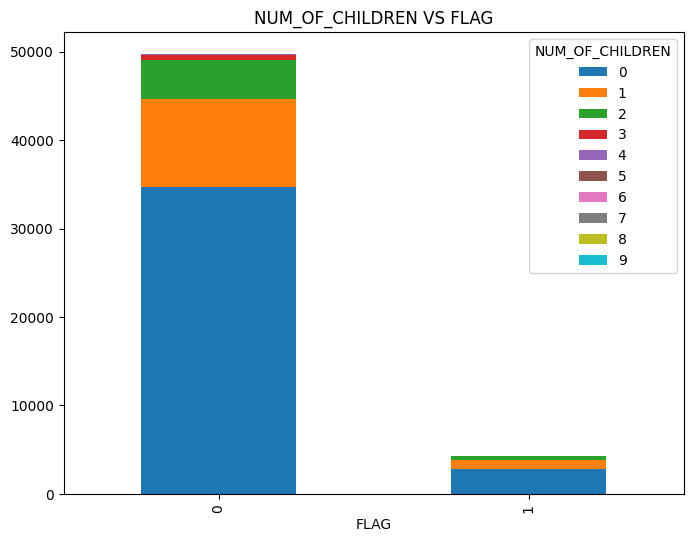

In [91]:
# Jumlah Anak
figure_stacked("NUM_OF_CHILDREN")

<Figure size 640x480 with 0 Axes>

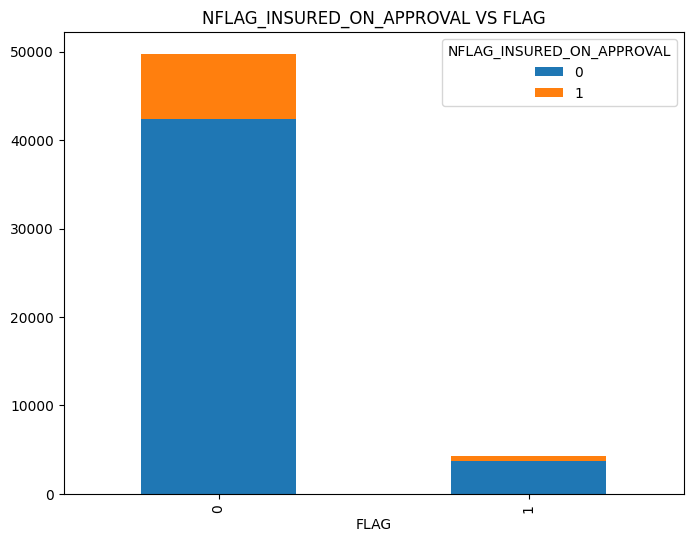

In [92]:
# Permohonan Asuransi
figure_stacked("NFLAG_INSURED_ON_APPROVAL")

<ipython-input-93-7acdf00e62dd>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["No Late", "Late"], fontsize=12)


Text(0, 0.5, 'Jumlah')

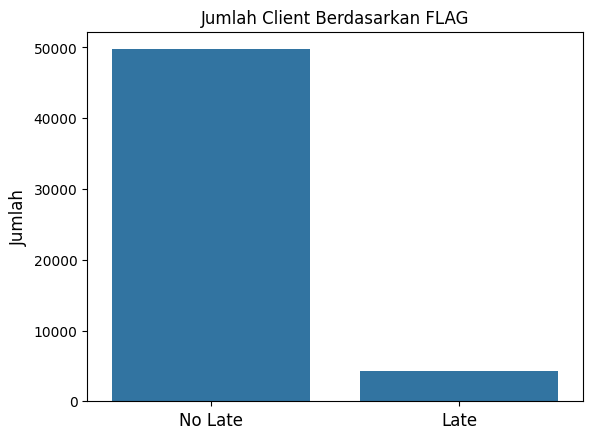

In [93]:
# Sebaran FLAG
# Insurance
fig, ax = plt.subplots()

sns.countplot(data=df_full_train, x="FLAG", ax=ax)
ax.set_xticklabels(["No Late", "Late"], fontsize=12)
ax.set_title("Jumlah Client Berdasarkan FLAG")
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Jumlah", fontsize=12)

In [94]:
df_full_train.FLAG.value_counts()

0    49748
1     4326
Name: FLAG, dtype: int64

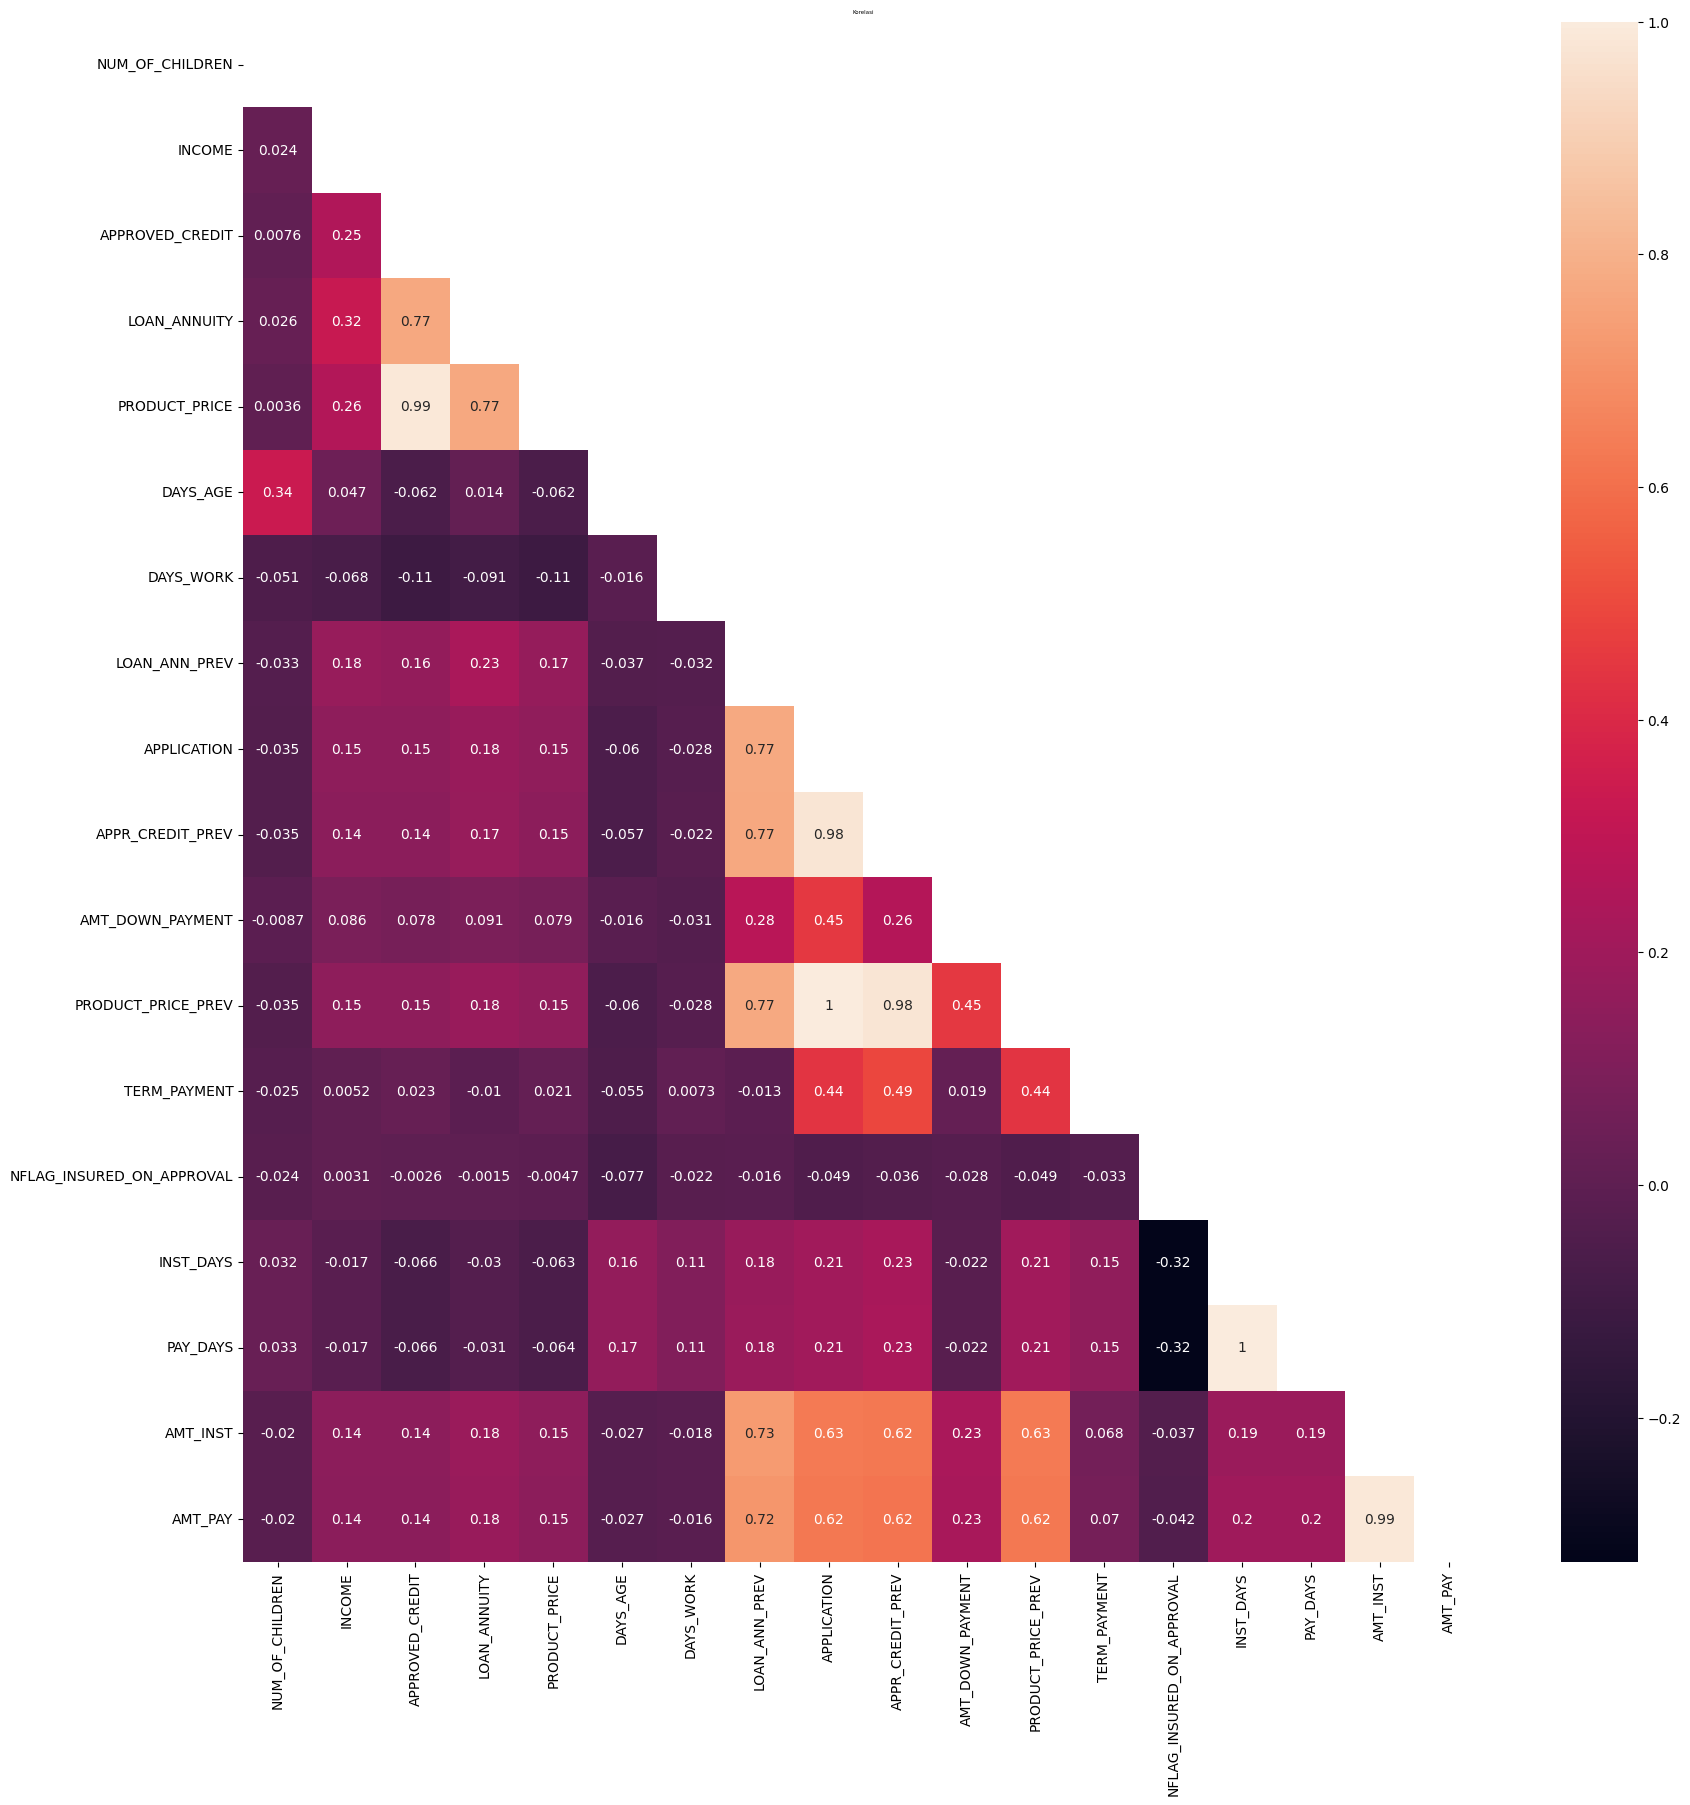

In [95]:
# Matriks Korelasi Untuk Data numerik
drop_col = [
    "U_ID",
    "FLAG",
    "CONTRACT_TYPE",
    "INCOME_CATEGORY",
    "EDUCATION",
    "FAMILY_STATUS",
    "HOUSING_CATEGORY",
    "ORGANIZATION_CATEGORY",
    "CONTRACT_TP_PREV",
    "YIELD_GROUP",
]

corr = df_full_train.drop(columns=drop_col).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot=True, mask=mask)
plt.title("Korelasi", fontsize=4)
plt.show()

**Kolom didrop karena terjadi multicolinearitas:**


1.   approved_credit / product_price
2.   loan_annuity_prev,
3.   applicaton,
4.   product_price_prev
5.   inst_days
6.   amt_inst
7. product_price
8. appr_credit_prev

**Kolom didrop karena terlalu banyak variasi untuk kategori**
1.  organization_category

**Kolom didrop karena hanya persebaran data yang terlalu timpang dan hanya terdapat dua nilai saja**
1. contract_type
2. contract_type_prev



In [96]:
col_to_drop = [
    "APPROVED_CREDIT",
    "LOAN_ANN_PREV",
    "APPLICATION",
    "PRODUCT_PRICE_PREV",
    "INST_DAYS",
    "AMT_INST",
    "PRODUCT_PRICE",
    "APPR_CREDIT_PREV",
    "ORGANIZATION_CATEGORY",
    "CONTRACT_TYPE",
    "CONTRACT_TP_PREV",
]


df_full_train.drop(col_to_drop, axis=1, inplace=True)
df_full_train.head()

,U_ID,FLAG,NUM_OF_CHILDREN,INCOME,LOAN_ANNUITY,INCOME_CATEGORY,EDUCATION,FAMILY_STATUS,HOUSING_CATEGORY,DAYS_AGE,DAYS_WORK,AMT_DOWN_PAYMENT,TERM_PAYMENT,YIELD_GROUP,NFLAG_INSURED_ON_APPROVAL,PAY_DAYS,AMT_PAY
0,333538,0,1,67500.0,10125.0,Working,Secondary / secondary special,Married,With parents,-11539,-921,2196.0,4.0,middle,0,-519,5378.68
1,406644,0,1,202500.0,49869.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15743,-4482,0.0,24.0,high,1,-1388,10660.46
2,259130,0,0,180000.0,25060.5,Pensioner,Secondary / secondary special,Married,House / apartment,-20775,0,5868.0,12.0,low_normal,0,-1462,6126.65
3,411997,0,0,225000.0,26086.5,State servant,Higher education,Married,House / apartment,-20659,-10455,5625.0,12.0,high,1,-1756,12793.37
4,241559,0,0,135000.0,9000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-9013,-1190,9210.0,8.0,low_normal,0,-929,8907.54


In [97]:
df_full_test.drop(col_to_drop, axis=1, inplace=True)
df_full_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13014 entries, 0 to 13013
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   U_ID                       13014 non-null  int64  
 1   FLAG                       13014 non-null  int64  
 2   NUM_OF_CHILDREN            13014 non-null  int64  
 3   INCOME                     13014 non-null  float64
 4   LOAN_ANNUITY               13014 non-null  float64
 5   INCOME_CATEGORY            13014 non-null  object 
 6   EDUCATION                  13014 non-null  object 
 7   FAMILY_STATUS              13014 non-null  object 
 8   HOUSING_CATEGORY           13014 non-null  object 
 9   DAYS_AGE                   13014 non-null  int64  
 10  DAYS_WORK                  13014 non-null  int64  
 11  AMT_DOWN_PAYMENT           13014 non-null  float64
 12  TERM_PAYMENT               13014 non-null  float64
 13  YIELD_GROUP                13014 non-null  obj

## Boxplot Data Numerik terhadap Beberapa Kategori

In [ ]:
# Buat nanti

## Label Encoding untuk Data Education

In [ ]:
# Bismillah
from sklearn.preprocessing import LabelEncoder

globals()['LE_{}'.format("EDUCATION")] = LabelEncoder()
df_full_train["EDUCATION"] = globals()['LE_{}'.format("EDUCATION")].fit_transform(df_full_train["EDUCATION"])
df_full_test["EDUCATION"] = globals()['LE_{}'.format("EDUCATION")].fit_transform(df_full_test["EDUCATION"])

df_full_train.head()


,U_ID,FLAG,NUM_OF_CHILDREN,INCOME,LOAN_ANNUITY,INCOME_CATEGORY,EDUCATION,FAMILY_STATUS,HOUSING_CATEGORY,DAYS_AGE,DAYS_WORK,AMT_DOWN_PAYMENT,TERM_PAYMENT,YIELD_GROUP,NFLAG_INSURED_ON_APPROVAL,PAY_DAYS,AMT_PAY
0,333538,0,1,67500.0,10125.0,Working,4,Married,With parents,-11539,-921,2196.0,4.0,middle,0,-519,5378.68
1,406644,0,1,202500.0,49869.0,Commercial associate,4,Married,House / apartment,-15743,-4482,0.0,24.0,high,1,-1388,10660.46
2,259130,0,0,180000.0,25060.5,Pensioner,4,Married,House / apartment,-20775,0,5868.0,12.0,low_normal,0,-1462,6126.65
3,411997,0,0,225000.0,26086.5,State servant,1,Married,House / apartment,-20659,-10455,5625.0,12.0,high,1,-1756,12793.37
4,241559,0,0,135000.0,9000.0,Commercial associate,4,Single / not married,House / apartment,-9013,-1190,9210.0,8.0,low_normal,0,-929,8907.54


## One hot encoding data object yang lain

In [ ]:
from sklearn.preprocessing import OneHotEncoder

col_to_encode = ["INCOME_CATEGORY", "FAMILY_STATUS", "HOUSING_CATEGORY", "YIELD_GROUP"]

try_df_train = df_full_train.copy()
try_df_test = df_full_test.copy()
onehotencoder = OneHotEncoder()

for col in col_to_encode:
  X = onehotencoder.fit_transform(df_full_train[col].values.reshape(-1,1)).toarray()
  dfOneHot = pd.DataFrame(X, columns=[col +"_"+ str(val) for val in np.sort(try_df_train[col].unique())])
  dfOneHot = dfOneHot.astype("uint8")
  df = pd.concat([try_df_train, dfOneHot], axis=1)
  df = df.drop([col], axis=1)
  try_df_train = df.copy()

for col in col_to_encode:
  X = onehotencoder.fit_transform(df_full_test[col].values.reshape(-1,1)).toarray()
  dfOneHot = pd.DataFrame(X, columns=[col +"_"+ str(val) for val in np.sort(try_df_test[col].unique())])
  dfOneHot = dfOneHot.astype("uint8")
  df = pd.concat([try_df_test, dfOneHot], axis=1)
  df = df.drop([col], axis=1)
  try_df_test = df.copy()



try_df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54074 entries, 0 to 54073
Data columns (total 33 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   U_ID                                  54074 non-null  int64  
 1   FLAG                                  54074 non-null  int64  
 2   NUM_OF_CHILDREN                       54074 non-null  int64  
 3   INCOME                                54074 non-null  float64
 4   LOAN_ANNUITY                          54074 non-null  float64
 5   EDUCATION                             54074 non-null  int64  
 6   DAYS_AGE                              54074 non-null  int64  
 7   DAYS_WORK                             54074 non-null  int64  
 8   AMT_DOWN_PAYMENT                      54074 non-null  float64
 9   TERM_PAYMENT                          54074 non-null  float64
 10  NFLAG_INSURED_ON_APPROVAL             54074 non-null  int64  
 11  PAY_DAYS       

In [ ]:
try_df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13014 entries, 0 to 13013
Data columns (total 33 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   U_ID                                  13014 non-null  int64  
 1   FLAG                                  13014 non-null  int64  
 2   NUM_OF_CHILDREN                       13014 non-null  int64  
 3   INCOME                                13014 non-null  float64
 4   LOAN_ANNUITY                          13014 non-null  float64
 5   EDUCATION                             13014 non-null  int64  
 6   DAYS_AGE                              13014 non-null  int64  
 7   DAYS_WORK                             13014 non-null  int64  
 8   AMT_DOWN_PAYMENT                      13014 non-null  float64
 9   TERM_PAYMENT                          13014 non-null  float64
 10  NFLAG_INSURED_ON_APPROVAL             13014 non-null  int64  
 11  PAY_DAYS       

## Penyesuaian Satuan Hari menjadi Tahun

In [ ]:
# Ubah satuan hari jadi bulan
try_df_train.DAYS_WORK = abs(try_df_train.DAYS_WORK) / 365.0
try_df_train.DAYS_AGE = abs(try_df_train.DAYS_AGE) / 365.0

try_df_test.DAYS_WORK = abs(try_df_test.DAYS_WORK) / 365.0
try_df_test.DAYS_AGE = abs(try_df_test.DAYS_AGE) / 365.0


In [ ]:
try_df_train.rename(columns = {"DAYS_WORK": "YEARS_WORK", "DAYS_AGE": "YEARS_AGE"}, inplace=True)
try_df_test.rename(columns = {"DAYS_WORK": "YEARS_WORK", "DAYS_AGE": "YEARS_AGE"}, inplace=True)

In [ ]:
try_df_train.head()

,U_ID,FLAG,NUM_OF_CHILDREN,INCOME,LOAN_ANNUITY,EDUCATION,YEARS_AGE,YEARS_WORK,AMT_DOWN_PAYMENT,TERM_PAYMENT,...,HOUSING_CATEGORY_House / apartment,HOUSING_CATEGORY_Municipal apartment,HOUSING_CATEGORY_Office apartment,HOUSING_CATEGORY_Rented apartment,HOUSING_CATEGORY_With parents,YIELD_GROUP_NA1,YIELD_GROUP_high,YIELD_GROUP_low_action,YIELD_GROUP_low_normal,YIELD_GROUP_middle
0,333538,0,1,67500.0,10125.0,4,31.61,2.52,2196.0,4.0,...,0,0,0,0,1,0,0,0,0,1
1,406644,0,1,202500.0,49869.0,4,43.13,12.28,0.0,24.0,...,1,0,0,0,0,0,1,0,0,0
2,259130,0,0,180000.0,25060.5,4,56.92,0.00,5868.0,12.0,...,1,0,0,0,0,0,0,0,1,0
3,411997,0,0,225000.0,26086.5,1,56.60,28.64,5625.0,12.0,...,1,0,0,0,0,0,1,0,0,0
4,241559,0,0,135000.0,9000.0,4,24.69,3.26,9210.0,8.0,...,1,0,0,0,0,0,0,0,1,0


# Modelling

**Split Data untuk Feature dan Target**


In [ ]:
# MEngubah positif data, kalau tidak telat itu positif, kalau telat itu negatif
try_df_train.FLAG.replace([0,1], [1,0], inplace=True)
try_df_test.FLAG.replace([0,1], [1,0], inplace=True)

In [ ]:
X_train = try_df_train.drop(["U_ID", "FLAG"], axis=1)
y_train = try_df_train["FLAG"]
X_test = try_df_test.drop(["U_ID", "FLAG"], axis=1)
y_test = try_df_test["FLAG"]

In [ ]:
y_train.value_counts()

1    49748
0     4326
Name: FLAG, dtype: int64

In [ ]:
y_test.value_counts()

1    11956
0     1058
Name: FLAG, dtype: int64

***Balancing SMOTE***

In [ ]:
# define Pipeline
over = SMOTE(sampling_strategy=0.5, k_neighbors = 8)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [("o", over), ('u', under)]
pipeline = Pipeline(steps=steps)

# Transform dataset
X_over_train, y_over_train = pipeline.fit_resample(X_train, y_train)
X_over_test, y_over_test = pipeline.fit_resample(X_test, y_test)

In [ ]:
y_over_train.value_counts()

1    49748
0    24874
Name: FLAG, dtype: int64

In [ ]:
y_over_test.value_counts()

1    11956
0     5978
Name: FLAG, dtype: int64

In [ ]:
models = [
    ("DTC", DecisionTreeClassifier()),
    ("ETC", ExtraTreesClassifier()),
    ("KNN", KNeighborsClassifier()),
    ("RFC", RandomForestClassifier()),
    ("GNB", GaussianNB())
]

models_name = []
results = []

for name, model in models:
  model.fit(X_over_train, y_over_train)
  score = model.score(X_over_test, y_over_test)
  models_name.append(name)
  results.append(score)
  print(f"{name}  ->  acc_score: {score}")

DTC  ->  acc_score: 0.8592059774729564
ETC  ->  acc_score: 0.9263410282145645
KNN  ->  acc_score: 0.6099029775844764
RFC  ->  acc_score: 0.9220475075276012
GNB  ->  acc_score: 0.5260399241663879


**Digunakan 5 metode klasifikasi untuk mengetahui mana yang terbaik**

## Hyperparameter tuning

In [ ]:
# param = {
#     'n_estimators': [100, 150, 200, 250, 300],
#     'max_depth' : [20, 30, 40, 50 , 60],
#     'criterion' :['gini', 'entropy']
# }
# extraa_tree = ExtraTreesClassifier()

# CV_extraa_tree = GridSearchCV(estimator=extraa_tree, param_grid=param, cv=5)
# CV_extraa_tree.fit(X_over_train, y_over_train)

In [ ]:
# CV_extraa_tree.best_params_

In [ ]:
# Final Model
model = ExtraTreesClassifier(criterion='entropy', n_estimators=300, max_depth=60)

model.fit(X_over_train, y_over_train)

y_pred = model.predict(X_over_test)

# Evalution

In [ ]:
# Metrics Evaluation
print(f'roc_auc_score: {roc_auc_score(y_over_test, y_pred)}\n')
print(f'f1_score: {f1_score(y_over_test, y_pred)}\n')
print(f"precision: {precision_score(y_over_test, y_pred)}\n")
print(f"accuracy: {accuracy_score(y_over_test, y_pred)}\n")
print(f'classification report: \n{ classification_report(y_over_test, y_pred)}\n')

roc_auc_score: 0.890598862495818

f1_score: 0.947355874289801

precision: 0.9022931960947551

accuracy: 0.9261179881788781

classification report: 
              precision    recall  f1-score   support

           0       0.99      0.78      0.88      5978
           1       0.90      1.00      0.95     11956

    accuracy                           0.93     17934
   macro avg       0.95      0.89      0.91     17934
weighted avg       0.93      0.93      0.92     17934




Text(70.72222222222221, 0.5, 'True Labels')

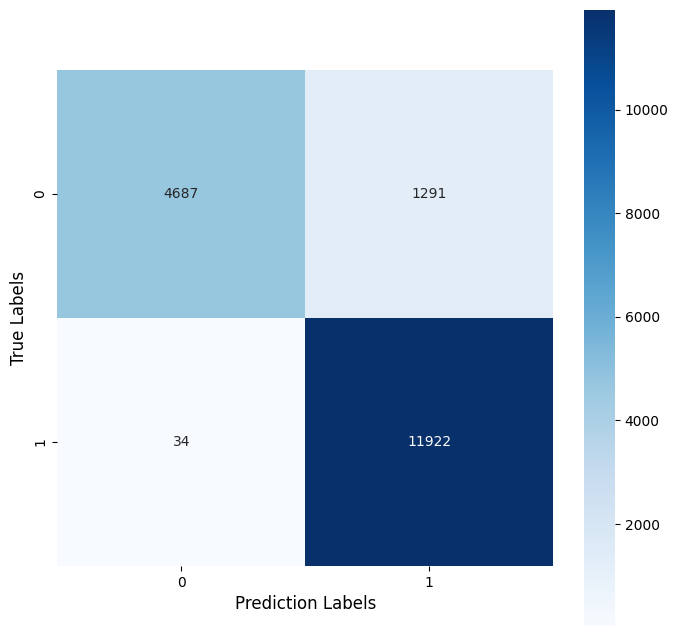

In [ ]:
conf_matrix = confusion_matrix(y_over_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(conf_matrix, square=True, annot=True, fmt="g", cmap="Blues")
ax.set_xlabel('Prediction Labels', fontsize=12)
ax.set_ylabel('True Labels', fontsize=12)

In [ ]:
np.sort(model.feature_importances_)

array([0.00202635, 0.00246805, 0.00381327, 0.0055313 , 0.00942294,
       0.01160476, 0.01392833, 0.01442119, 0.01859515, 0.01863139,
       0.02101964, 0.02831808, 0.03094899, 0.03240131, 0.03924628,
       0.0402609 , 0.04088862, 0.04136119, 0.04168219, 0.0425599 ,
       0.04291513, 0.04314001, 0.04419555, 0.04539073, 0.04557115,
       0.04634276, 0.0521507 , 0.05348903, 0.05418161, 0.05517398,
       0.05831952])

In [ ]:
model.feature_names = list(X_train.columns.values)

In [ ]:
def plot_feature_importance(importance,names,model_type):
    feature_importance_array = np.array(importance)
    feature_names_array = np.array(names)

    data={'feature_names':feature_names_array,'feature_importance':feature_importance_array}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

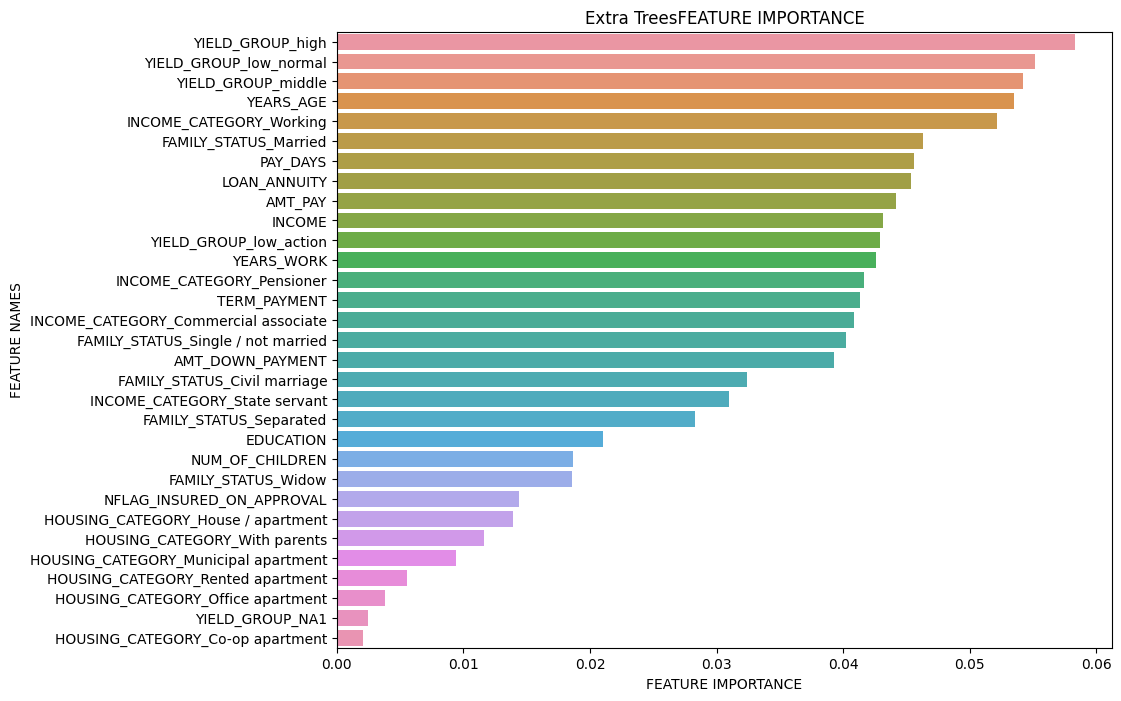

In [ ]:
plot_feature_importance(model.feature_importances_, model.feature_names,'Extra Trees')

# Lampiran

In [98]:
new_df = df_full_train.copy()
new_df.FLAG.replace([0,1], ["NO_LATE", "LATE"], inplace=True)
new_df.info()
new_df.DAYS_AGE = abs(df_full_train.DAYS_AGE) / 365.0
new_df.rename(columns = {"DAYS_AGE": "YEARS_AGE"}, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54074 entries, 0 to 54073
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   U_ID                       54074 non-null  int64  
 1   FLAG                       54074 non-null  object 
 2   NUM_OF_CHILDREN            54074 non-null  int64  
 3   INCOME                     54074 non-null  float64
 4   LOAN_ANNUITY               54074 non-null  float64
 5   INCOME_CATEGORY            54074 non-null  object 
 6   EDUCATION                  54074 non-null  object 
 7   FAMILY_STATUS              54074 non-null  object 
 8   HOUSING_CATEGORY           54074 non-null  object 
 9   DAYS_AGE                   54074 non-null  int64  
 10  DAYS_WORK                  54074 non-null  int64  
 11  AMT_DOWN_PAYMENT           54074 non-null  float64
 12  TERM_PAYMENT               54074 non-null  float64
 13  YIELD_GROUP                54074 non-null  obj

In [99]:
new_df.FLAG.value_counts()

NO_LATE    49748
LATE        4326
Name: FLAG, dtype: int64

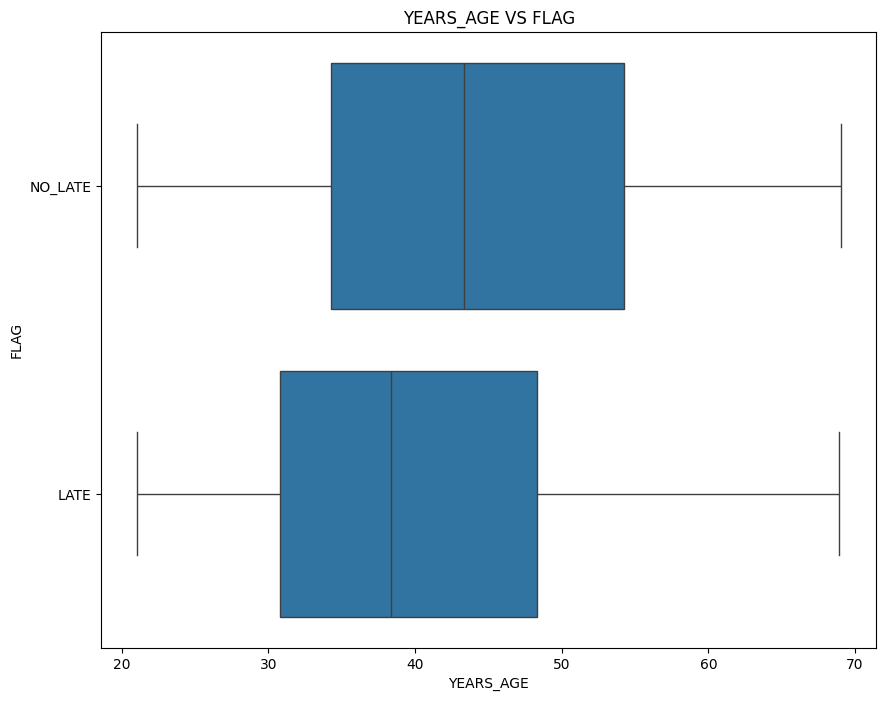

In [100]:
def plotNumerik(col1, col2="FLAG"):
  plt.figure(figsize = (10,8))
  sns.boxplot(x=col1, y=col2, data=new_df)
  plt.title(f"{col1} VS {col2}")

def plotNumerikVertikal(col1, col2='FLAG'):
  plt.figure(figsize = (10,8))
  sns.boxplot(x=col2, y=col1, data=new_df)
  plt.title(f"{col1} VS {col2}")

# Usia dan FLAG
plotNumerik("YEARS_AGE")

In [101]:
def plotNumerik2(col1, hue, col2="FLAG"):
  plt.figure(figsize = (10,8))
  sns.boxplot(x=col1, y=col2, data=new_df, hue=hue)
  plt.title(f"{col1} VS {col2}")

def plotScatter(col1, hue, col2="FLAG"):
  plt.figure(figsize = (10,8))
  sns.scatterplot(x=col1, y=col2, data=new_df[new_df["YIELD_GROUP"] == "high"], hue=hue)
  plt.title(f"{col1} VS {col2}")

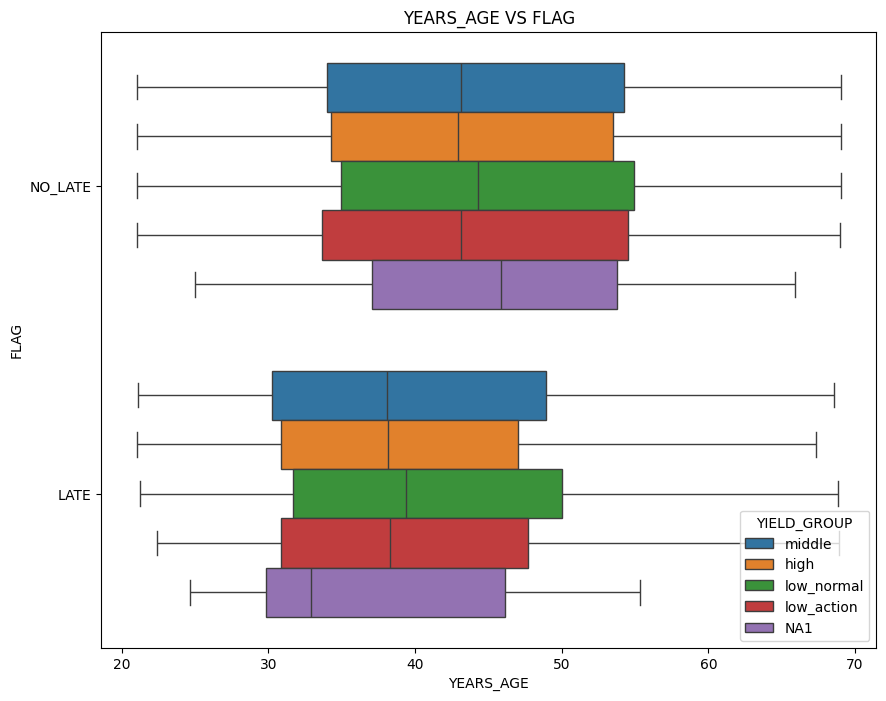

In [102]:
plotNumerik2('YEARS_AGE', 'YIELD_GROUP')

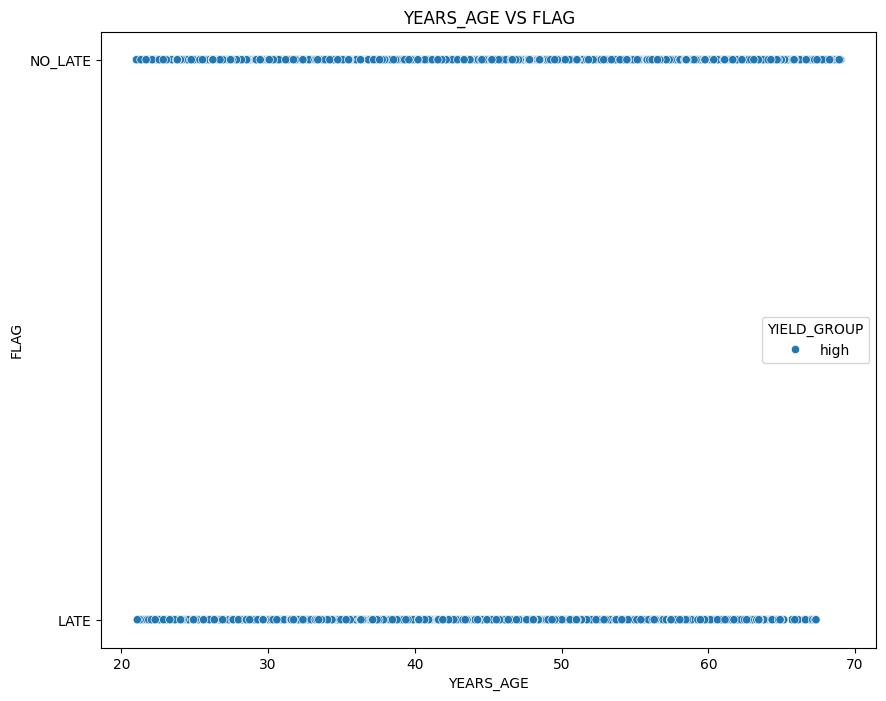

In [103]:
plotScatter('YEARS_AGE', 'YIELD_GROUP')

In [104]:
# Liat jumlah data nasabah telat dan ga telat berdasarkan umur dan suku bunganya
# bunga_tinggi_condition = new_df["YEARS_AGE"] < 30 and new_df["YIELD_GROUP"] == "high"
data_bunga_tinggi = new_df[new_df["YEARS_AGE"] < 30]
data_bunga_tinggi = data_bunga_tinggi[data_bunga_tinggi["YIELD_GROUP"] == "high"]

print(f"Data bunga tinggi: \n{data_bunga_tinggi.FLAG.value_counts()}")

Data bunga tinggi: 
NO_LATE    2446
LATE        391
Name: FLAG, dtype: int64


In [106]:
data_bunga_tinggi = new_df[new_df["YEARS_AGE"] < 40]
data_bunga_tinggi = data_bunga_tinggi[data_bunga_tinggi["YEARS_AGE"] >= 30]
data_bunga_tinggi = data_bunga_tinggi[data_bunga_tinggi["YIELD_GROUP"] == "high"]

print(f"Data bunga tinggi: \n{data_bunga_tinggi.FLAG.value_counts()}")

Data bunga tinggi: 
NO_LATE    4889
LATE        607
Name: FLAG, dtype: int64


In [107]:
data_bunga_tinggi = new_df[new_df["YEARS_AGE"] < 50]
data_bunga_tinggi = data_bunga_tinggi[data_bunga_tinggi["YEARS_AGE"] >= 40]
data_bunga_tinggi = data_bunga_tinggi[data_bunga_tinggi["YIELD_GROUP"] == "high"]

print(f"Data bunga tinggi: \n{data_bunga_tinggi.FLAG.value_counts()}")

Data bunga tinggi: 
NO_LATE    4625
LATE        456
Name: FLAG, dtype: int64


In [108]:
data_bunga_tinggi = new_df[new_df["YEARS_AGE"] < 60]
data_bunga_tinggi = data_bunga_tinggi[data_bunga_tinggi["YEARS_AGE"] >= 50]
data_bunga_tinggi = data_bunga_tinggi[data_bunga_tinggi["YIELD_GROUP"] == "high"]

print(f"Data bunga tinggi: \n{data_bunga_tinggi.FLAG.value_counts()}")

Data bunga tinggi: 
NO_LATE    3617
LATE        236
Name: FLAG, dtype: int64


In [ ]:
data_bunga_normal = new_df[new_df["YEARS_AGE"] < 30]
data_bunga_normal = data_bunga_normal[data_bunga_normal["YIELD_GROUP"] == "low_normal"]

print(f"Data bunga normal: \n{data_bunga_normal.FLAG.value_counts()}")

In [ ]:
data_bunga_sedang = new_df[new_df["YEARS_AGE"] < 30]
data_bunga_sedang = data_bunga_sedang[data_bunga_sedang["YIELD_GROUP"] == "middle"]

print(f"Data bunga sedang: \n{data_bunga_sedang.FLAG.value_counts()}")

In [ ]:
plotNumerik2("YEARS_AGE", "INCOME_CATEGORY")

In [ ]:
working = new_df[new_df["YEARS_AGE"] < 30]
working = working[working["INCOME_CATEGORY"] == "Working"]
working = working[working["YIELD_GROUP"] == "high"]

print(f"Data Tipe Pekerjaan: \n{working.FLAG.value_counts()}")

In [ ]:
plotNumerik2("YEARS_AGE", "FAMILY_STATUS")

In [ ]:
plotNumerikVertikal("INCOME")

In [ ]:
plotNumerik("TERM_PAYMENT")

In [ ]:
plotNumerik("PAY_DAYS")

In [ ]:
plotNumerik("AMT_PAY")

In [ ]:
plotNumerik("AMT_DOWN_PAYMENT")

In [ ]:
plotNumerik("LOAN_ANNUITY")

In [ ]:
plotNumerik("NUM_OF_CHILDREN")